In [1]:
pip install -U vnstock

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install ta

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install keras-self-attention

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
import pandas as pd
from ta.momentum import RSIIndicator
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, RNN, concatenate
from tensorflow.keras.optimizers import RMSprop
from vnstock import *
from ta.volatility import BollingerBands
from tensorflow.keras.layers import Layer
import tensorflow as tf
from keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, Flatten, BatchNormalization
from sklearn.model_selection import RandomizedSearchCV
# from scikeras.wrappers import KerasClassifier

from ta.momentum import StochasticOscillator
from ta.volume import OnBalanceVolumeIndicator
from ta.trend import CCIIndicator
from sklearn.preprocessing import StandardScaler
from ta.volume import ChaikinMoneyFlowIndicator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras import regularizers
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.saving import register_keras_serializable
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from vnstock import *
import pandas as pd
import os
from collections import Counter
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
import optuna
import joblib
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    f1_score, accuracy_score, classification_report, roc_auc_score,
    roc_curve, auc, make_scorer
)
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from sklearn.metrics import precision_score, recall_score
import shap

Phiên bản Vnai 2.1.9 đã có mặt, vui lòng cập nhật với câu lệnh : `pip install vnai --upgrade`.
Lịch sử phiên bản: https://pypi.org/project/vnai/#history
Phiên bản hiện tại 2.0.4

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [9]:
def dataframe_to_x_y(df, feature, target):
  X_train, y_train = [], []
  X_val, y_val = [], []
  n = len(df)
  split_index = int(n * 0.8)
  X_train = df[feature][:split_index]
  y_train = df[target][:split_index]
  X_val = df[feature][split_index:]
  y_val = df[target][split_index:]
  return X_train, y_train, X_val, y_val

In [10]:

sentiment_columns = [
        'Reputation', 'Company Communication', 'Appointment', 'Financial', 'Regulatory',
        'Sales', 'M&A', 'Legal', 'Dividend Policy', 'Risks', 'Rumors', 'Strategy',
        'Options', 'IPO', 'Signal', 'Coverage', 'Fundamentals', 'Insider Activity',
        'Price Action', 'Buyside', 'Technical Analysis', 'Trade', 'Central Banks',
        'Currency', 'Conditions', 'Market', 'Volatility', 'Investor Sentiment', 'Retail Investor Behavior',
        'Speculation', 'Domestic Institutional Behavior', 'Foreign Institutional Behavior', 'Black Swan Event',
    ]

sentiment_p1d_columns = [
        'reputation_p1d', 'company_communication_p1d', 'appointment_p1d', 'financial_p1d', 'regulatory_p1d',
        'sales_p1d', 'm&a_p1d', 'legal_p1d', 'dividend_policy_p1d', 'risks_p1d', 'rumors_p1d', 'strategy_p1d',
        'options_p1d', 'ipo_p1d', 'signal_p1d', 'coverage_p1d', 'fundamentals_p1d', 'insider_activity_p1d',
        'price_action_p1d', 'buyside_p1d', 'technical_analysis_p1d', 'trade_p1d', 'central_banks_p1d',
        'currency_p1d', 'conditions_p1d', 'market_p1d', 'volatility_p1d', 'investor_sentiment_p1d', 'retail_investor_behavior_p1d',
        'speculation_p1d', 'domestic_institutional_behavior_p1d', 'foreign_institutional_behavior_p1d', 'black_swan_event_p1d',
    ]
meta_cols = ['num_sa_news', 'mean_sentiment_norm', 'max_sentiment_norm', 'std_sentiment_score', 'sum_positive_sa', 'sum_negative_sa', 'time_distance_from_sa_to_close_minutes']
meta_p1d_cols = ['num_sa_news_p1d', 'mean_sentiment_norm_p1d', 'max_sentiment_norm_p1d', 'std_sentiment_score_p1d', 'sum_positive_sa_p1d', 'sum_negative_sa_p1d', 'time_distance_from_sa_to_close_minutes_p1d']

sentiment_feature_selected =  sentiment_columns + sentiment_p1d_columns + meta_cols + meta_p1d_cols
ta_features = ['volume_ma','volume_to_volume_ma_ratio','ema_12','ema_26','sma_20','sma_50','roc_5','roc_1','roc_9','%K','%R','cci','obv','macd','signal_line','macd_histogram','rsi','rsi_base_ma','rsi_rsi_base_ma_ratio','bb_bbm','bb_bbh','bb_bbl','bb_bbp','bb_bbh_bb_bbl_ratio','hl_ratio', 'co_ratio', 'price_range', 'sma_ratio_20_50', 'ema_ratio_12_26', 'bb_width', 'bb_position', 'rsi_overbought', 'rsi_oversold', 'rsi_neutral', 'macd_bullish', 'momentum_5', 'momentum_10','log_return','volatility_5d','volatility_10d','volatility_20d','volatility_30d','mean_log_return_5d','mean_log_return_10d','mean_log_return_20d','mean_log_return_30d','sharpe_like_5d','sharpe_like_10d','sharpe_like_20d','sharpe_like_30d','up_streak','pos_log_return_ratio_20d','z_score_5d','z_score_10d','z_score_20d','z_score_30d','annual_return','daily_return','sharpe_ratio',
               'rsi_vn30','rsi_base_ma_vn30','rsi_rsi_base_ma_ratio_vn30','volume_ma_vn30','volume_to_volume_ma_ratio_vn30','bb_bbm_vn30','bb_bbh_vn30','bb_bbl_vn30','bb_bbp_vn30','bb_bbh_bb_bbl_ratio_vn30','roc_1_vn30', 'roc_5_vn30', 'roc_9_vn30','%K_vn30','%R_vn30','cci_vn30','obv_vn30','ema_12_vn30','ema_26_vn30','sma_20_vn30','sma_50_vn30', 'hl_ratio_vn30', 'co_ratio_vn30', 'price_range_vn30', 'sma_ratio_20_50_vn30', 'ema_ratio_12_26_vn30', 'bb_width_vn30', 'bb_position_vn30', 'rsi_overbought_vn30', 'rsi_oversold_vn30', 'rsi_neutral_vn30', 'momentum_5_vn30', 'momentum_10_vn30', 'log_return_vn30','volatility_5d_vn30','volatility_10d_vn30','volatility_20d_vn30','volatility_30d_vn30','mean_log_return_5d_vn30','mean_log_return_10d_vn30','mean_log_return_20d_vn30','mean_log_return_30d_vn30','sharpe_like_5d_vn30','sharpe_like_10d_vn30','sharpe_like_20d_vn30','sharpe_like_30d_vn30','up_streak_vn30','pos_log_return_ratio_20d_vn30','z_score_5d_vn30','z_score_10d_vn30','z_score_20d_vn30','z_score_30d_vn30','annual_return_vn30','daily_return_vn30','sharpe_ratio_vn30',
               'rsi_vni','rsi_base_ma_vni','rsi_rsi_base_ma_ratio_vni','volume_ma_vni','volume_to_volume_ma_ratio_vni','bb_bbm_vni','bb_bbh_vni','bb_bbl_vni','bb_bbp_vni','bb_bbh_bb_bbl_ratio_vni','roc_1_vni', 'roc_5_vni', 'roc_9_vni','%K_vni','%R_vni','cci_vni','obv_vni','ema_12_vni','ema_26_vni','sma_20_vni','sma_50_vni', 'hl_ratio_vni', 'co_ratio_vni', 'price_range_vni', 'sma_ratio_20_50_vni', 'ema_ratio_12_26_vni', 'bb_width_vni', 'bb_position_vni', 'rsi_overbought_vni', 'rsi_oversold_vni', 'rsi_neutral_vni', 'momentum_5_vni', 'momentum_10_vni','log_return_vni','volatility_5d_vni','volatility_10d_vni','volatility_20d_vni','volatility_30d_vni','mean_log_return_5d_vni','mean_log_return_10d_vni','mean_log_return_20d_vni','mean_log_return_30d_vni','sharpe_like_5d_vni','sharpe_like_10d_vni','sharpe_like_20d_vni','sharpe_like_30d_vni','up_streak_vni','pos_log_return_ratio_20d_vni','z_score_5d_vni','z_score_10d_vni','z_score_20d_vni','z_score_30d_vni','annual_return_vni','daily_return_vni','sharpe_ratio_vni']
fa_features = ['p/b_previous_quarter', 'p/b_change_rate','p/b_change_rate_flag','p/e_previous_quarter','p/e_change_rate','p/e_change_rate_flag','p/s_previous_quarter','p/s_change_rate','p/s_change_rate_flag','p/cash_flow_previous_quarter','p/cash_flow_change_rate','p/cash_flow_change_rate_flag','eps_previous_quarter','eps_change_rate', 'eps_change_rate_flag','bvps_previous_quarter','bvps_change_rate', 'bvps_change_rate_flag','roe_previous_quarter','roe_change_rate','roe_change_rate_flag','roa_previous_quarter','roa_change_rate','roa_change_rate_flag','coefficient_p/b','coefficient_p/e','coefficient_p/s','coefficient_p/cash_flow','coefficient_eps','coefficient_bvps','coefficient_roe','coefficient_roa','distance_to_nearest_quarter']
ta_fa_feature_selected = ta_features + fa_features
features = ta_fa_feature_selected + sentiment_feature_selected
target = 'target'
scaler = StandardScaler()

In [11]:
def load_data_for_analysis(tickers, folder_path):

    df_all = []

    for ticker in tickers:
        file_path = os.path.join(folder_path, f"{ticker}.xlsx")
        if os.path.exists(file_path):
            df = pd.read_excel(file_path)
            df["ticker"] = ticker  # thêm cột ticker
            df_all.append(df)
        else:
            print(f"⚠️ Không tìm thấy: {file_path}")

    # Gộp lại thành 1 DataFrame
    df_global = pd.concat(df_all, ignore_index=True)
    print(f"✅ Đã load xong {len(df_global)} dòng dữ liệu từ {len(df_all)} cổ phiếu.")
    return df_global

In [12]:
tickers = ['ACB', 'BCM', 'BID','BVH','CTG','FPT','GAS','GVR','HDB','HPG',
                    'LPB','MBB','MSN','MWG','PLX','SAB','SHB','SSB','SSI','STB',
                    'TCB','TPB','VCB','VHM','VIB','VIC','VJC','VNM','VPB','VRE']
folder_path_train = r"D:\thacsi\TAILIEULUANVAN\code\PredictStock_TA_FA_SA\TA_FA_SA\data\v6\out_performance_vn30\train_data" 
folder_path_test = r"D:\thacsi\TAILIEULUANVAN\code\PredictStock_TA_FA_SA\TA_FA_SA\data\v6\out_performance_vn30\test_data" 
df_global_train = load_data_for_analysis(tickers, folder_path_train)
df_global_test = load_data_for_analysis(tickers, folder_path_test)


✅ Đã load xong 35865 dòng dữ liệu từ 30 cổ phiếu.
✅ Đã load xong 7380 dòng dữ liệu từ 30 cổ phiếu.


In [13]:
def evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, model_dict):
    f1_weighted_scores = []
    f1_micro_scores = []
    f1_macro_scores = []
    acc_scores = []
    auc_micro_scores = []
    auc_weighted_scores = []
    auc_macro_scores = []
    precision_micro_scores = []
    precision_macro_scores = []
    precision_weighted_scores = []
    recall_micro_scores = []
    recall_macro_scores = []
    recall_weighted_scores = []
    model_names = list(model_dict.keys())

    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes)
    roc_data = {}

    for name in model_names:
        base_model = model_dict[name]
        model = clone(base_model)

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)

        # F1 Scores
        f1_weighted = f1_score(y_test, y_pred, average='weighted')
        f1_micro = f1_score(y_test, y_pred, average='micro')
        f1_macro = f1_score(y_test, y_pred, average='macro')
        acc = accuracy_score(y_test, y_pred)

        # Precision
        precision_micro = precision_score(y_test, y_pred, average='micro', zero_division=0)
        precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
        precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)

        # Recall
        recall_micro = recall_score(y_test, y_pred, average='micro', zero_division=0)
        recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
        recall_weighted = recall_score(y_test, y_pred, average='weighted', zero_division=0)

        print(f"{name} Test F1 (weighted): {f1_weighted:.4f}")
        print(f"{name} Test F1 (micro)   : {f1_micro:.4f}")
        print(f"{name} Test F1 (macro)   : {f1_macro:.4f}")
        print(f"{name} Test Accuracy     : {acc:.4f}")
        print(f"{name} Precision (micro/macro/weighted): {precision_micro:.4f} / {precision_macro:.4f} / {precision_weighted:.4f}")
        print(f"{name} Recall (micro/macro/weighted): {recall_micro:.4f} / {recall_macro:.4f} / {recall_weighted:.4f}")
        print(classification_report(y_test, y_pred))

        try:
            roc_auc_micro = roc_auc_score(y_test_bin, y_proba, average='micro', multi_class='ovr')
            roc_auc_weighted = roc_auc_score(y_test_bin, y_proba, average='weighted', multi_class='ovr')
            roc_auc_macro = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')
            print(f"{name} ROC AUC (micro ovr): {roc_auc_micro:.4f}")
            print(f"{name} ROC AUC (weighted ovr): {roc_auc_weighted:.4f}")
            print(f"{name} ROC AUC (macro ovr): {roc_auc_macro:.4f}")
        except ValueError:
            print(f"{name} ROC AUC could not be computed (possibly due to only one class present in y_test)")
            roc_auc_micro = np.nan
            roc_auc_weighted = np.nan
            roc_auc_macro = np.nan

        # Lưu dữ liệu để vẽ
        fpr = {}
        tpr = {}
        roc_auc_class = {}
        for i, cls in enumerate(classes):
            fpr[cls], tpr[cls], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc_class[cls] = auc(fpr[cls], tpr[cls])
        roc_data[name] = {"fpr": fpr, "tpr": tpr, "auc": roc_auc_class}

        # Lưu điểm số
        f1_weighted_scores.append(f1_weighted)
        f1_micro_scores.append(f1_micro)
        f1_macro_scores.append(f1_macro)
        acc_scores.append(acc)
        auc_micro_scores.append(roc_auc_micro)
        auc_weighted_scores.append(roc_auc_weighted)
        auc_macro_scores.append(roc_auc_macro)
        precision_micro_scores.append(precision_micro)
        precision_macro_scores.append(precision_macro)
        precision_weighted_scores.append(precision_weighted)
        recall_micro_scores.append(recall_micro)
        recall_macro_scores.append(recall_macro)
        recall_weighted_scores.append(recall_weighted)

    return (
        model_names,
        f1_weighted_scores,
        f1_micro_scores,
        f1_macro_scores,
        acc_scores,
        auc_micro_scores,
        auc_weighted_scores,
        auc_macro_scores,
        precision_micro_scores,
        precision_macro_scores,
        precision_weighted_scores,
        recall_micro_scores,
        recall_macro_scores,
        recall_weighted_scores,
        roc_data
    )

Evaluate with ta data

In [14]:
# Danh sách các mô hình
models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced_subsample'),
    "XGBoost": XGBClassifier(n_jobs=-1, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(n_jobs=-1, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Random Forest_optimize": RandomForestClassifier(
        n_jobs=-1,
        random_state=42,
        class_weight='balanced_subsample',
        n_estimators= 552,
        max_depth = 24,
        min_samples_split = 3, 
        min_samples_leaf = 7, 
        max_features = 'sqrt'
        
    ),
    "XGBoost_optimize": XGBClassifier(
        n_jobs=-1,
        random_state=42, 
        use_label_encoder=False, 
        eval_metric='mlogloss',
        n_estimators = 484,
        max_depth = 4, 
        learning_rate = 0.010729733835579425, 
        subsample = 0.8475761082300941, 
        colsample_bytree = 0.40740086364643935
    ),

    "LightGBM_optimize": LGBMClassifier(
        class_weight = "balanced",
        objective = "multiclass",
        metric = "multi_logloss",
        verbosity = -1,
        random_state = 42,
        n_jobs = -1,
        n_estimators = 678, 
        max_depth = 10, 
        learning_rate = 0.010451129787383398, 
        num_leaves = 41, 
        subsample = 0.9070209365911411, 
        colsample_bytree = 0.3253488510157635, 
        min_child_samples = 69
    ),
    "CatBoost_optimize": CatBoostClassifier(
        verbose=0,
        auto_class_weights = "Balanced",  # giúp giảm mất cân bằng lớp
        loss_function = "MultiClass",
        eval_metric = "MultiClass",
        random_seed = 42,
        iterations = 611,
        depth = 7, 
        learning_rate = 0.017772855089424312, 
        l2_leaf_reg = 5.417401265075917, 
        bagging_temperature = 0.9927068493506941, 
        random_strength = 1.5271877954308244, 
        border_count = 234
    ),
    "AdaBoost_optimize": AdaBoostClassifier(
        random_state=42,
        n_estimators = 110, 
        learning_rate = 0.08755262248308043, 
        algorithm = 'SAMME.R', 
        estimator = DecisionTreeClassifier(max_depth=1, class_weight="balanced"),
    ),
}

In [15]:
X_train_ta = df_global_train[ta_features]
X_test_ta = df_global_test[ta_features]
y_train = df_global_train[target]
y_test = df_global_test[target]

scaler = StandardScaler()
X_train_ta_scaled = scaler.fit_transform(X_train_ta)
X_test_ta_scaled = scaler.transform(X_test_ta)    

In [16]:
print("Đánh giá với bộ feature ta")
  
model_names, \
f1_weighted_scores_no_sa, f1_micro_scores_no_sa, \
f1_macro_scores_no_sa, acc_scores_no_sa, \
auc_micro_scores_no_sa, auc_weighted_scores_no_sa, auc_macro_scores_no_sa, \
precision_micro_scores_no_sa, precision_macro_scores_no_sa, precision_weighted_scores_no_sa, \
recall_micro_scores_no_sa, recall_macro_scores_no_sa, recall_weighted_scores_no_sa, \
roc_data_no_sa = evaluate_models(
    X_train_ta_scaled, X_test_ta_scaled, y_train, y_test, models
)

Đánh giá với bộ feature ta
Random Forest Test F1 (weighted): 0.5772
Random Forest Test F1 (micro)   : 0.6911
Random Forest Test F1 (macro)   : 0.2950
Random Forest Test Accuracy     : 0.6911
Random Forest Precision (micro/macro/weighted): 0.6911 / 0.4551 / 0.5854
Random Forest Recall (micro/macro/weighted): 0.6911 / 0.3414 / 0.6911
              precision    recall  f1-score   support

           0       0.31      0.01      0.02      1164
           1       0.70      0.99      0.82      5118
           2       0.36      0.02      0.04      1098

    accuracy                           0.69      7380
   macro avg       0.46      0.34      0.30      7380
weighted avg       0.59      0.69      0.58      7380

Random Forest ROC AUC (micro ovr): 0.8052
Random Forest ROC AUC (weighted ovr): 0.6072
Random Forest ROC AUC (macro ovr): 0.5969


[21:49:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost Test F1 (weighted): 0.5892
XGBoost Test F1 (micro)   : 0.6779
XGBoost Test F1 (macro)   : 0.3276
XGBoost Test Accuracy     : 0.6779
XGBoost Precision (micro/macro/weighted): 0.6779 / 0.4029 / 0.5667
XGBoost Recall (micro/macro/weighted): 0.6779 / 0.3526 / 0.6779
              precision    recall  f1-score   support

           0       0.24      0.05      0.08      1164
           1       0.71      0.95      0.81      5118
           2       0.26      0.06      0.09      1098

    accuracy                           0.68      7380
   macro avg       0.40      0.35      0.33      7380
weighted avg       0.57      0.68      0.59      7380

XGBoost ROC AUC (micro ovr): 0.8039
XGBoost ROC AUC (weighted ovr): 0.6120
XGBoost ROC AUC (macro ovr): 0.6004
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39131
[LightGBM] [Info] Number of data points 

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


AdaBoost Test F1 (weighted): 0.5817
AdaBoost Test F1 (micro)   : 0.6917
AdaBoost Test F1 (macro)   : 0.3025
AdaBoost Test Accuracy     : 0.6917
AdaBoost Precision (micro/macro/weighted): 0.6917 / 0.4438 / 0.5818
AdaBoost Recall (micro/macro/weighted): 0.6917 / 0.3448 / 0.6917
              precision    recall  f1-score   support

           0       0.24      0.02      0.03      1164
           1       0.70      0.99      0.82      5118
           2       0.39      0.03      0.06      1098

    accuracy                           0.69      7380
   macro avg       0.44      0.34      0.30      7380
weighted avg       0.58      0.69      0.58      7380

AdaBoost ROC AUC (micro ovr): 0.8074
AdaBoost ROC AUC (weighted ovr): 0.6127
AdaBoost ROC AUC (macro ovr): 0.6032
Random Forest_optimize Test F1 (weighted): 0.6101
Random Forest_optimize Test F1 (micro)   : 0.6720
Random Forest_optimize Test F1 (macro)   : 0.3794
Random Forest_optimize Test Accuracy     : 0.6720
Random Forest_optimize Preci

[21:52:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost_optimize Test F1 (weighted): 0.5749
XGBoost_optimize Test F1 (micro)   : 0.6924
XGBoost_optimize Test F1 (macro)   : 0.2889
XGBoost_optimize Test Accuracy     : 0.6924
XGBoost_optimize Precision (micro/macro/weighted): 0.6924 / 0.4308 / 0.5729
XGBoost_optimize Recall (micro/macro/weighted): 0.6924 / 0.3394 / 0.6924
              precision    recall  f1-score   support

           0       0.16      0.00      0.01      1164
           1       0.70      0.99      0.82      5118
           2       0.44      0.02      0.04      1098

    accuracy                           0.69      7380
   macro avg       0.43      0.34      0.29      7380
weighted avg       0.57      0.69      0.57      7380

XGBoost_optimize ROC AUC (micro ovr): 0.8153
XGBoost_optimize ROC AUC (weighted ovr): 0.6296
XGBoost_optimize ROC AUC (macro ovr): 0.6237
LightGBM_optimize Test F1 (weighted): 0.5880
LightGBM_optimize Test F1 (micro)   : 0.5827
LightGBM_optimize Test F1 (macro)   : 0.4093
LightGBM_optimize Tes

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


AdaBoost_optimize Test F1 (weighted): 0.5984
AdaBoost_optimize Test F1 (micro)   : 0.6157
AdaBoost_optimize Test F1 (macro)   : 0.3960
AdaBoost_optimize Test Accuracy     : 0.6157
AdaBoost_optimize Precision (micro/macro/weighted): 0.6157 / 0.4112 / 0.5899
AdaBoost_optimize Recall (micro/macro/weighted): 0.6157 / 0.3978 / 0.6157
              precision    recall  f1-score   support

           0       0.24      0.27      0.25      1164
           1       0.74      0.80      0.77      5118
           2       0.26      0.12      0.17      1098

    accuracy                           0.62      7380
   macro avg       0.41      0.40      0.40      7380
weighted avg       0.59      0.62      0.60      7380

AdaBoost_optimize ROC AUC (micro ovr): 0.7461
AdaBoost_optimize ROC AUC (weighted ovr): 0.6214
AdaBoost_optimize ROC AUC (macro ovr): 0.6144


Evaluate with ta + fa data

In [14]:
# Danh sách các mô hình
models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced_subsample'),
    "XGBoost": XGBClassifier(n_jobs=-1, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(n_jobs=-1, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Random Forest_optimize": RandomForestClassifier(
        n_jobs=-1,
        random_state=42,
        class_weight='balanced_subsample',
        n_estimators= 552,
        max_depth = 24,
        min_samples_split = 3, 
        min_samples_leaf = 7, 
        max_features = 'sqrt'
        
    ),
    "XGBoost_optimize": XGBClassifier(
        n_jobs=-1,
        random_state=42, 
        use_label_encoder=False, 
        eval_metric='mlogloss',
        n_estimators = 566,
        max_depth = 5, 
        learning_rate = 0.0123428638368712, 
        subsample = 0.9543207437815916, 
        colsample_bytree = 0.6203512417544524
    ),
    "LightGBM_optimize": LGBMClassifier(
        class_weight = "balanced",
        objective = "multiclass",
        metric = "multi_logloss",
        verbosity = -1,
        random_state = 42,
        n_jobs = -1,
        n_estimators = 678, 
        max_depth = 10, 
        learning_rate = 0.010451129787383398, 
        num_leaves = 41, 
        subsample = 0.9070209365911411, 
        colsample_bytree = 0.3253488510157635, 
        min_child_samples = 69
    ),
    "CatBoost_optimize": CatBoostClassifier(
        verbose=0,
        auto_class_weights = "Balanced",  # giúp giảm mất cân bằng lớp
        loss_function = "MultiClass",
        eval_metric = "MultiClass",
        random_seed = 42,
        iterations = 611,
        depth = 7, 
        learning_rate = 0.017772855089424312, 
        l2_leaf_reg = 5.417401265075917, 
        bagging_temperature = 0.9927068493506941, 
        random_strength = 1.5271877954308244, 
        border_count = 234
    ),
    "AdaBoost_optimize": AdaBoostClassifier(
        random_state=42,
        n_estimators = 110, 
        learning_rate = 0.08755262248308043, 
        algorithm = 'SAMME.R', 
        estimator = DecisionTreeClassifier(max_depth=1, class_weight="balanced"),
    ),
}

In [13]:
X_train_no_sa = df_global_train[ta_fa_feature_selected]
X_test_no_sa = df_global_test[ta_fa_feature_selected]
y_train = df_global_train[target]
y_test = df_global_test[target]

scaler = StandardScaler()
X_train_no_sa_scaled = scaler.fit_transform(X_train_no_sa)
X_test_no_sa_scaled = scaler.transform(X_test_no_sa)    

In [16]:
print("Đánh giá với bộ feature không có SA (chỉ ta + fa)")
  
model_names, \
f1_weighted_scores_no_sa, f1_micro_scores_no_sa, \
f1_macro_scores_no_sa, acc_scores_no_sa, \
auc_micro_scores_no_sa, auc_weighted_scores_no_sa, auc_macro_scores_no_sa, \
precision_micro_scores_no_sa, precision_macro_scores_no_sa, precision_weighted_scores_no_sa, \
recall_micro_scores_no_sa, recall_macro_scores_no_sa, recall_weighted_scores_no_sa, \
roc_data_no_sa = evaluate_models(
    X_train_no_sa_scaled, X_test_no_sa_scaled, y_train, y_test, models
)

Đánh giá với bộ feature không có SA (chỉ ta + fa)
Random Forest Test F1 (weighted): 0.5795
Random Forest Test F1 (micro)   : 0.6932
Random Forest Test F1 (macro)   : 0.2988
Random Forest Test Accuracy     : 0.6932
Random Forest Precision (micro/macro/weighted): 0.6932 / 0.5080 / 0.6098
Random Forest Recall (micro/macro/weighted): 0.6932 / 0.3439 / 0.6932
              precision    recall  f1-score   support

           0       0.36      0.02      0.03      1164
           1       0.70      0.99      0.82      5118
           2       0.47      0.03      0.05      1098

    accuracy                           0.69      7380
   macro avg       0.51      0.34      0.30      7380
weighted avg       0.61      0.69      0.58      7380

Random Forest ROC AUC (micro ovr): 0.8054
Random Forest ROC AUC (weighted ovr): 0.6069
Random Forest ROC AUC (macro ovr): 0.5972


[15:03:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost Test F1 (weighted): 0.5919
XGBoost Test F1 (micro)   : 0.6775
XGBoost Test F1 (macro)   : 0.3359
XGBoost Test Accuracy     : 0.6775
XGBoost Precision (micro/macro/weighted): 0.6775 / 0.4225 / 0.5753
XGBoost Recall (micro/macro/weighted): 0.6775 / 0.3568 / 0.6775
              precision    recall  f1-score   support

           0       0.27      0.06      0.10      1164
           1       0.71      0.95      0.81      5118
           2       0.29      0.06      0.10      1098

    accuracy                           0.68      7380
   macro avg       0.42      0.36      0.34      7380
weighted avg       0.58      0.68      0.59      7380

XGBoost ROC AUC (micro ovr): 0.8042
XGBoost ROC AUC (weighted ovr): 0.6114
XGBoost ROC AUC (macro ovr): 0.6043
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45312
[LightGBM] [Info] Number of data points 

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


AdaBoost Test F1 (weighted): 0.5848
AdaBoost Test F1 (micro)   : 0.6927
AdaBoost Test F1 (macro)   : 0.3096
AdaBoost Test Accuracy     : 0.6927
AdaBoost Precision (micro/macro/weighted): 0.6927 / 0.4893 / 0.6030
AdaBoost Recall (micro/macro/weighted): 0.6927 / 0.3483 / 0.6927
              precision    recall  f1-score   support

           0       0.33      0.03      0.05      1164
           1       0.70      0.99      0.82      5118
           2       0.43      0.03      0.06      1098

    accuracy                           0.69      7380
   macro avg       0.49      0.35      0.31      7380
weighted avg       0.60      0.69      0.58      7380

AdaBoost ROC AUC (micro ovr): 0.8093
AdaBoost ROC AUC (weighted ovr): 0.6164
AdaBoost ROC AUC (macro ovr): 0.6092
Random Forest_optimize Test F1 (weighted): 0.6059
Random Forest_optimize Test F1 (micro)   : 0.6718
Random Forest_optimize Test F1 (macro)   : 0.3695
Random Forest_optimize Test Accuracy     : 0.6718
Random Forest_optimize Preci

[15:06:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost_optimize Test F1 (weighted): 0.5822
XGBoost_optimize Test F1 (micro)   : 0.6928
XGBoost_optimize Test F1 (macro)   : 0.3041
XGBoost_optimize Test Accuracy     : 0.6928
XGBoost_optimize Precision (micro/macro/weighted): 0.6928 / 0.4786 / 0.5977
XGBoost_optimize Recall (micro/macro/weighted): 0.6928 / 0.3460 / 0.6928
              precision    recall  f1-score   support

           0       0.34      0.02      0.03      1164
           1       0.70      0.99      0.82      5118
           2       0.40      0.03      0.06      1098

    accuracy                           0.69      7380
   macro avg       0.48      0.35      0.30      7380
weighted avg       0.60      0.69      0.58      7380

XGBoost_optimize ROC AUC (micro ovr): 0.8173
XGBoost_optimize ROC AUC (weighted ovr): 0.6343
XGBoost_optimize ROC AUC (macro ovr): 0.6296
LightGBM_optimize Test F1 (weighted): 0.5915
LightGBM_optimize Test F1 (micro)   : 0.5855
LightGBM_optimize Test F1 (macro)   : 0.4161
LightGBM_optimize Tes

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


AdaBoost_optimize Test F1 (weighted): 0.5953
AdaBoost_optimize Test F1 (micro)   : 0.6126
AdaBoost_optimize Test F1 (macro)   : 0.3926
AdaBoost_optimize Test Accuracy     : 0.6126
AdaBoost_optimize Precision (micro/macro/weighted): 0.6126 / 0.4094 / 0.5887
AdaBoost_optimize Recall (micro/macro/weighted): 0.6126 / 0.3974 / 0.6126
              precision    recall  f1-score   support

           0       0.24      0.29      0.26      1164
           1       0.74      0.79      0.77      5118
           2       0.25      0.11      0.15      1098

    accuracy                           0.61      7380
   macro avg       0.41      0.40      0.39      7380
weighted avg       0.59      0.61      0.60      7380

AdaBoost_optimize ROC AUC (micro ovr): 0.7432
AdaBoost_optimize ROC AUC (weighted ovr): 0.6238
AdaBoost_optimize ROC AUC (macro ovr): 0.6171


In [18]:
base_optimize_pairs = [
    ("Random Forest", "Random Forest_optimize"),
    ("XGBoost", "XGBoost_optimize"),
    ("LightGBM", "LightGBM_optimize"),
    ("CatBoost", "CatBoost_optimize"),
    ("AdaBoost", "AdaBoost_optimize"),
]

SO SÁNH GIỮA BASE MODEL VÀ OPTIMIZED MODEL DỰA TRÊN CÁC TIÊU CHÍ TRƯỜNG HỢP KHÔNG CÓ SENTIMENT ANALYSIS

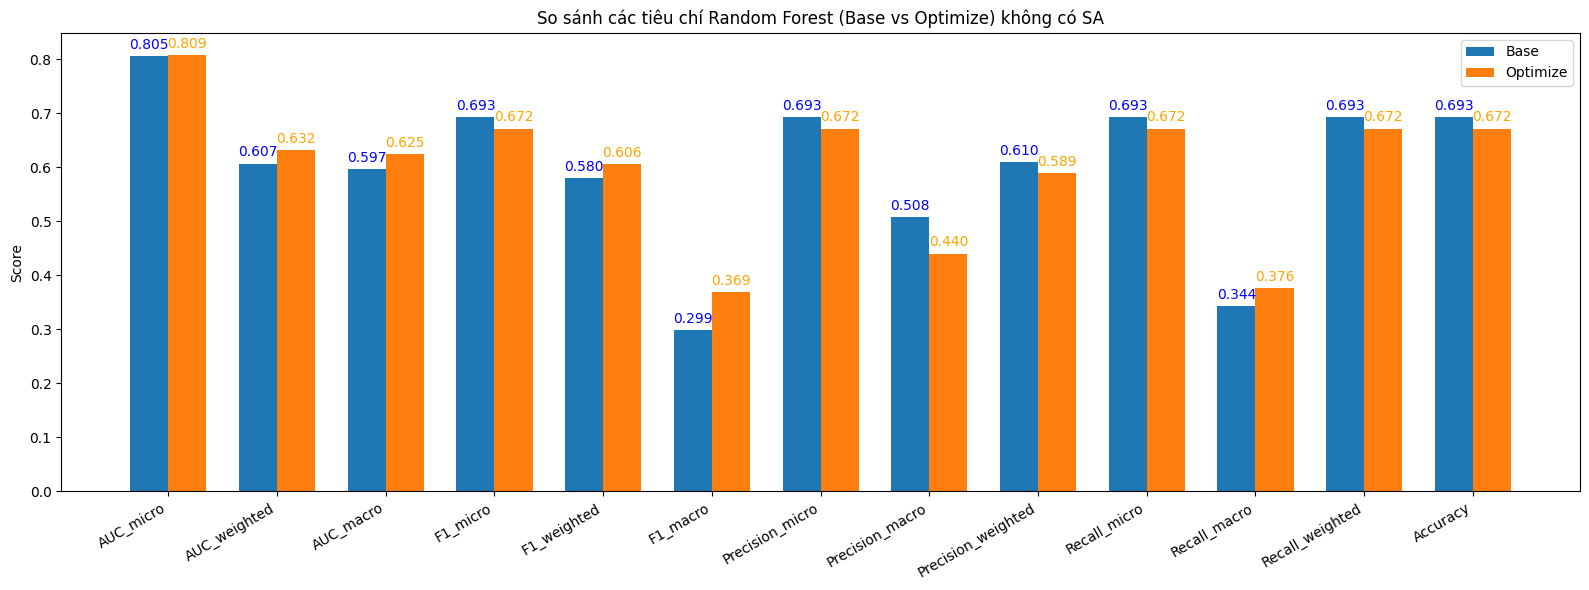

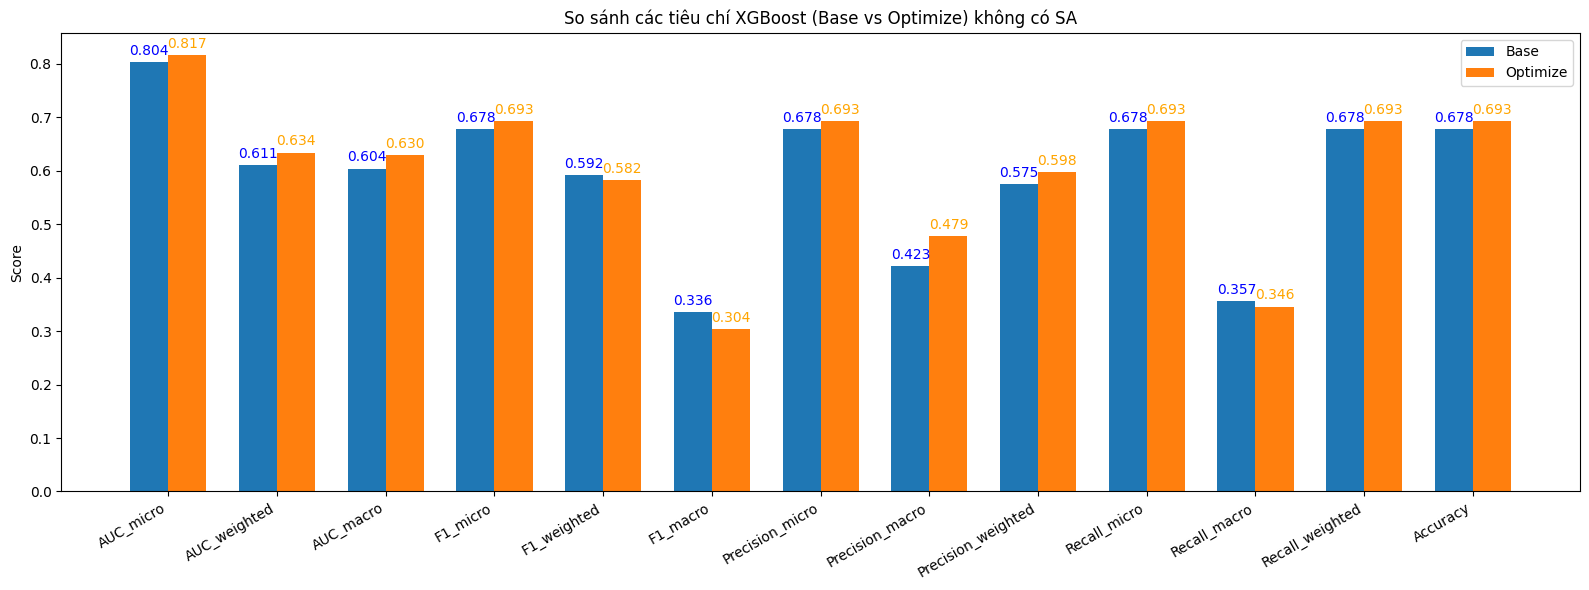

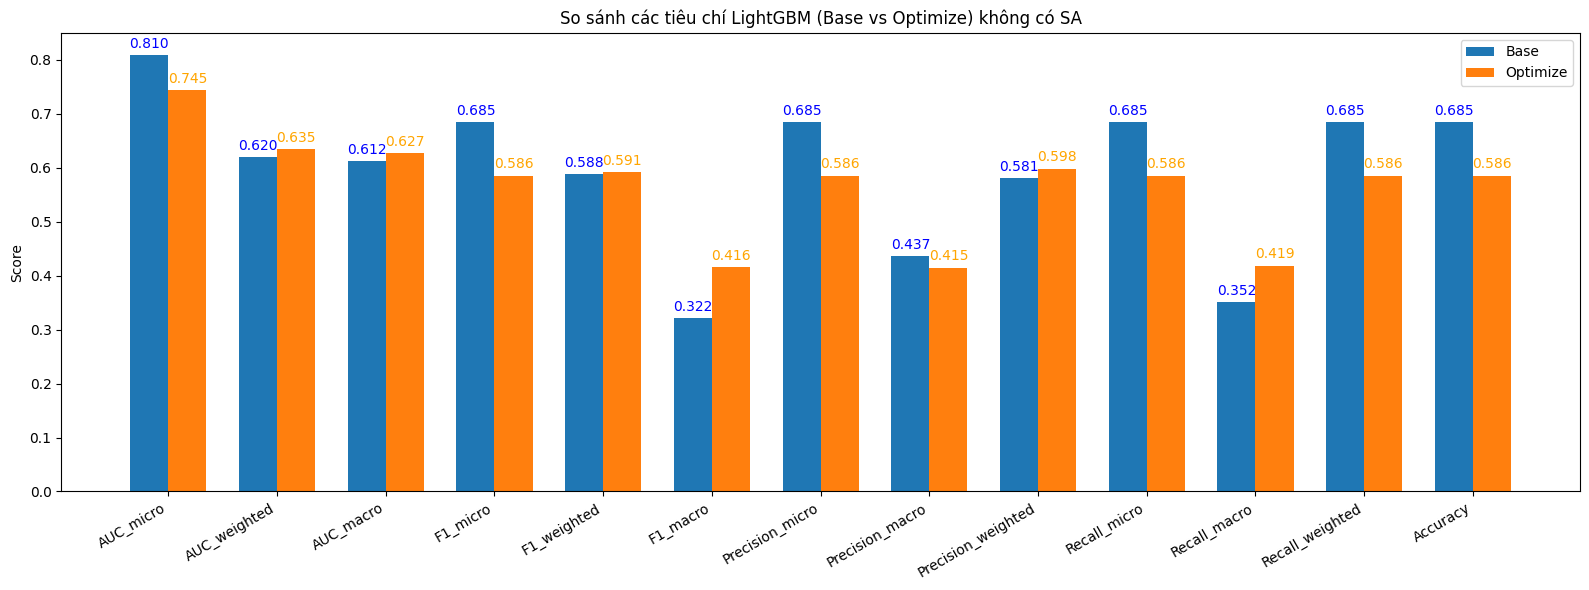

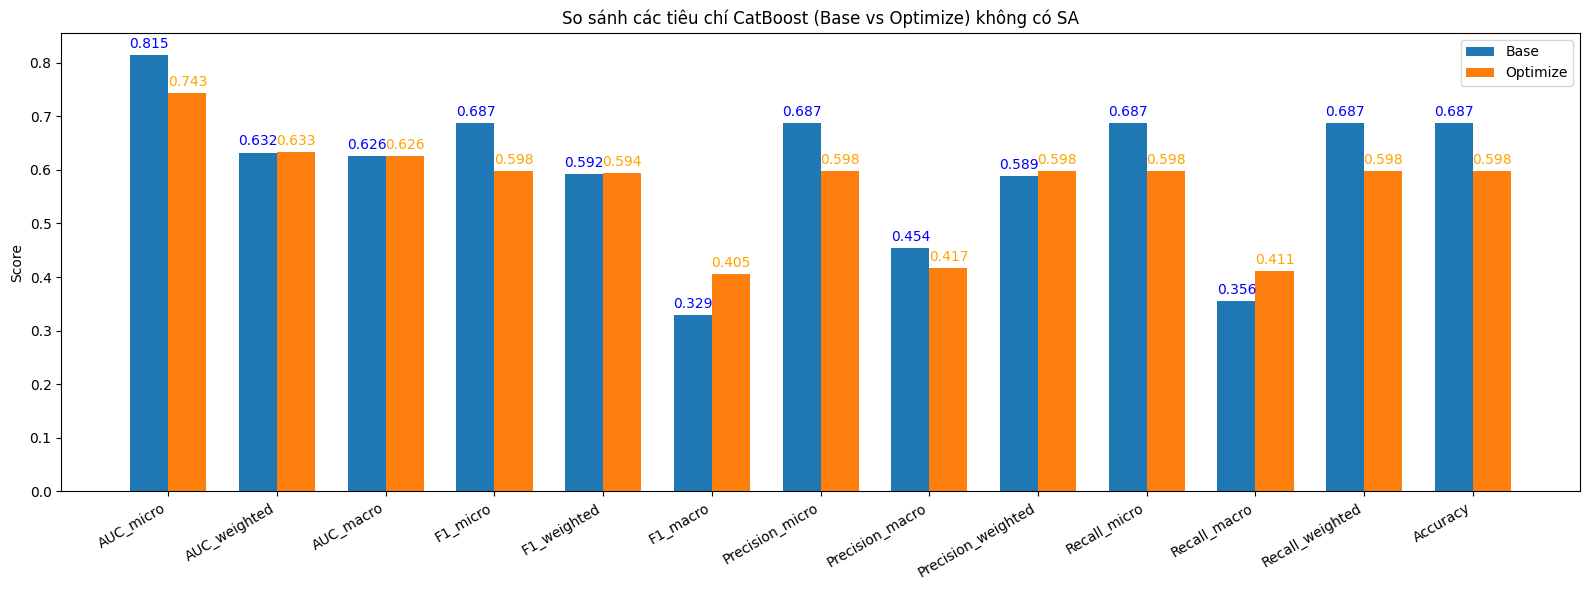

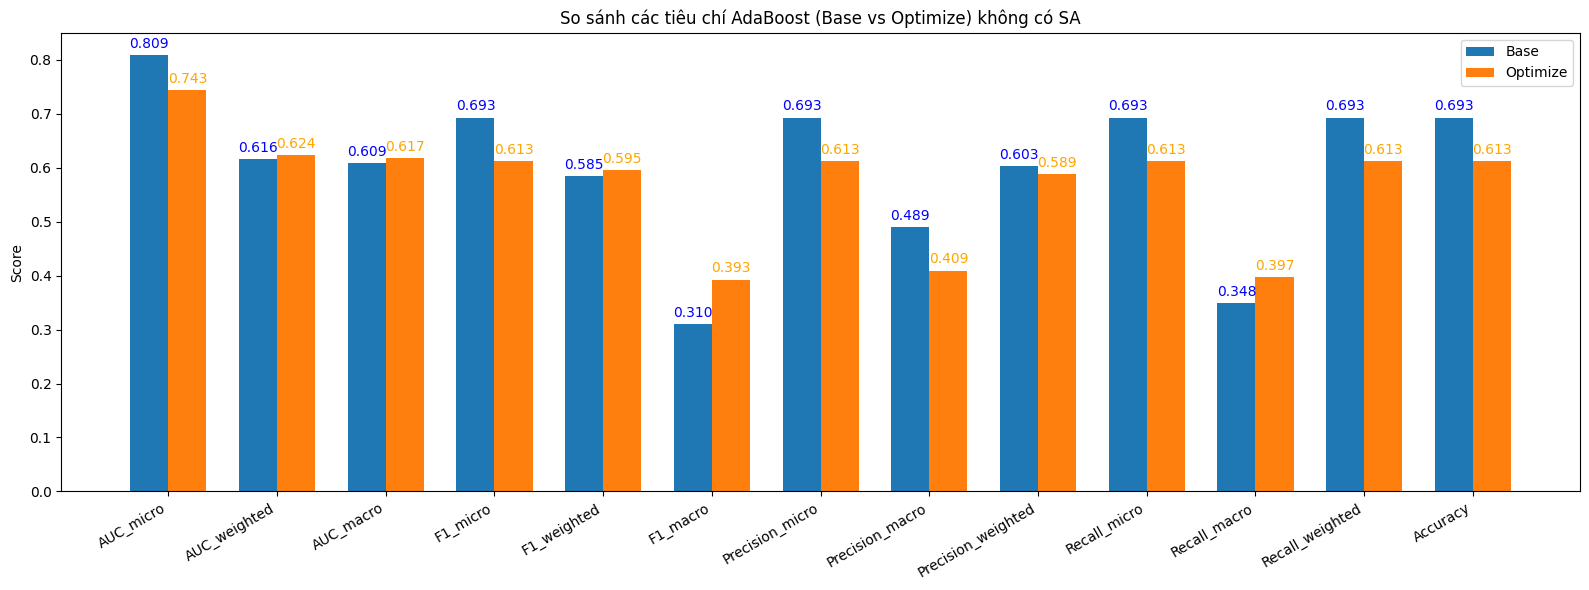

In [19]:
for base_name, opt_name in base_optimize_pairs:
    try:
        idx_base = model_names.index(base_name)
        idx_opt = model_names.index(opt_name)
    except ValueError:
        continue

    metrics = {
        "AUC_micro": [auc_micro_scores_no_sa[idx_base], auc_micro_scores_no_sa[idx_opt]],
        "AUC_weighted": [auc_weighted_scores_no_sa[idx_base], auc_weighted_scores_no_sa[idx_opt]],
        "AUC_macro": [auc_macro_scores_no_sa[idx_base], auc_macro_scores_no_sa[idx_opt]],
        "F1_micro": [f1_micro_scores_no_sa[idx_base], f1_micro_scores_no_sa[idx_opt]],
        "F1_weighted": [f1_weighted_scores_no_sa[idx_base], f1_weighted_scores_no_sa[idx_opt]],
        "F1_macro": [f1_macro_scores_no_sa[idx_base], f1_macro_scores_no_sa[idx_opt]],
        "Precision_micro": [precision_micro_scores_no_sa[idx_base], precision_micro_scores_no_sa[idx_opt]],
        "Precision_macro": [precision_macro_scores_no_sa[idx_base], precision_macro_scores_no_sa[idx_opt]],
        "Precision_weighted": [precision_weighted_scores_no_sa[idx_base], precision_weighted_scores_no_sa[idx_opt]],
        "Recall_micro": [recall_micro_scores_no_sa[idx_base], recall_micro_scores_no_sa[idx_opt]],
        "Recall_macro": [recall_macro_scores_no_sa[idx_base], recall_macro_scores_no_sa[idx_opt]],
        "Recall_weighted": [recall_weighted_scores_no_sa[idx_base], recall_weighted_scores_no_sa[idx_opt]],
        "Accuracy": [acc_scores_no_sa[idx_base], acc_scores_no_sa[idx_opt]],
    }
    labels = list(metrics.keys())
    base_scores = [v[0] for v in metrics.values()]
    opt_scores = [v[1] for v in metrics.values()]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(16, 6))
    bars1 = ax.bar(x - width/2, base_scores, width, label='Base')
    bars2 = ax.bar(x + width/2, opt_scores, width, label='Optimize')

    # Thêm số liệu trên đầu cột
    for bar in bars1:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    color='blue')
    for bar in bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    color='orange')

    ax.set_ylabel('Score')
    ax.set_title(f'So sánh các tiêu chí {base_name} (Base vs Optimize) không có SA')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=30, ha='right')
    ax.legend()
    plt.tight_layout()
    plt.show()

SO SÁNH GIỮA CÁC CHỈ SỐ GIỮA CÁC MÔ HÌNH KHÁC NHAU TRƯỜNG HỢP KHÔNG CÓ SENTIMENT ANALYSIS

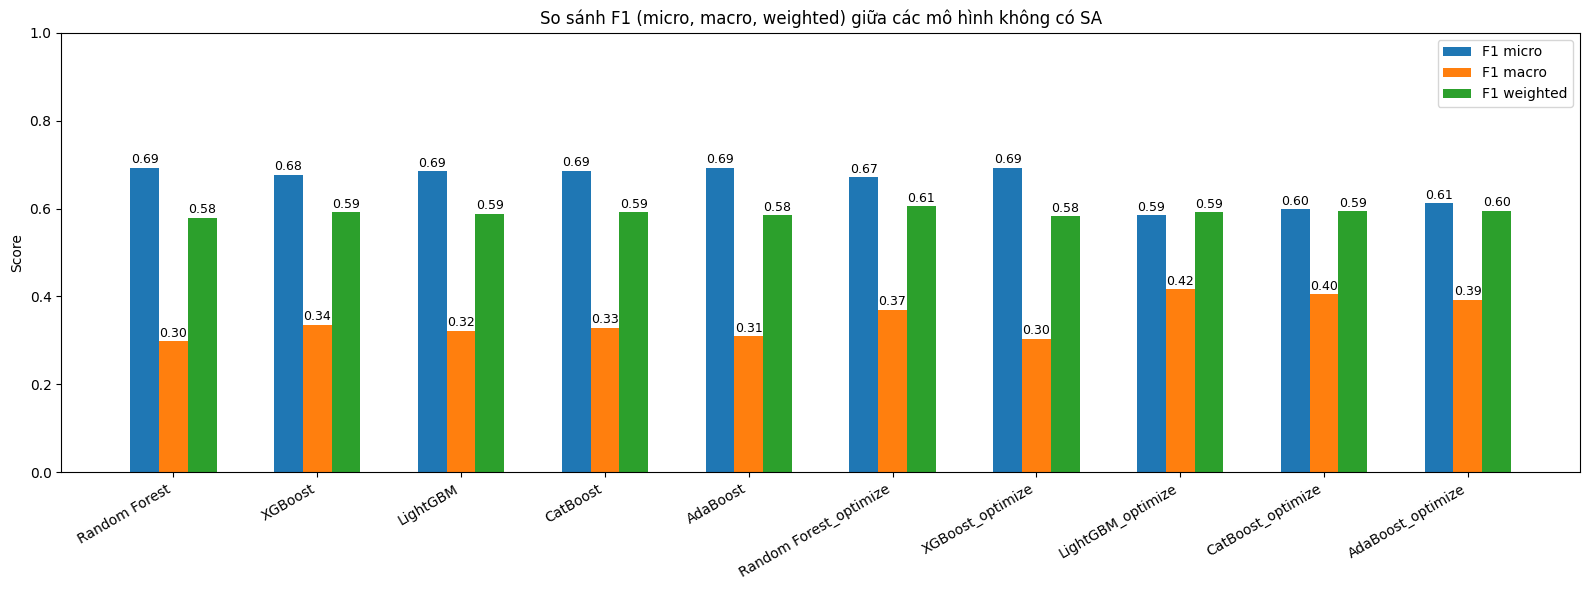

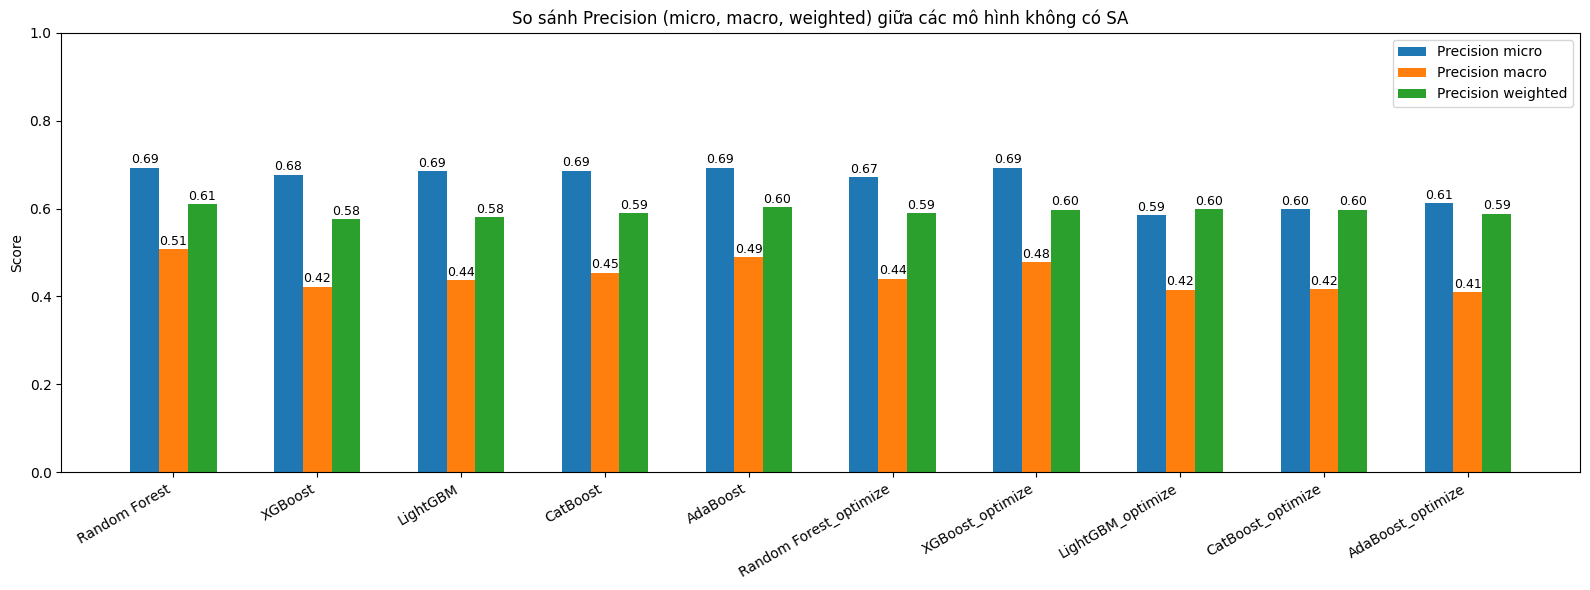

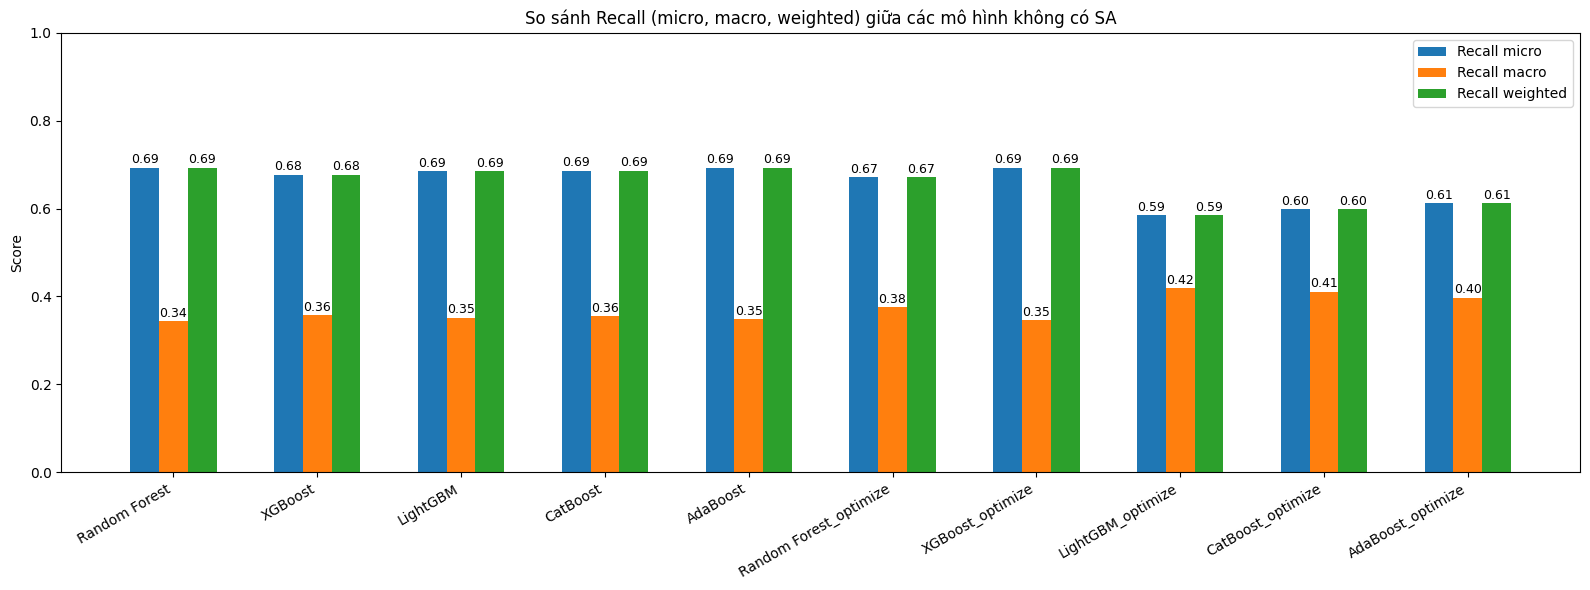

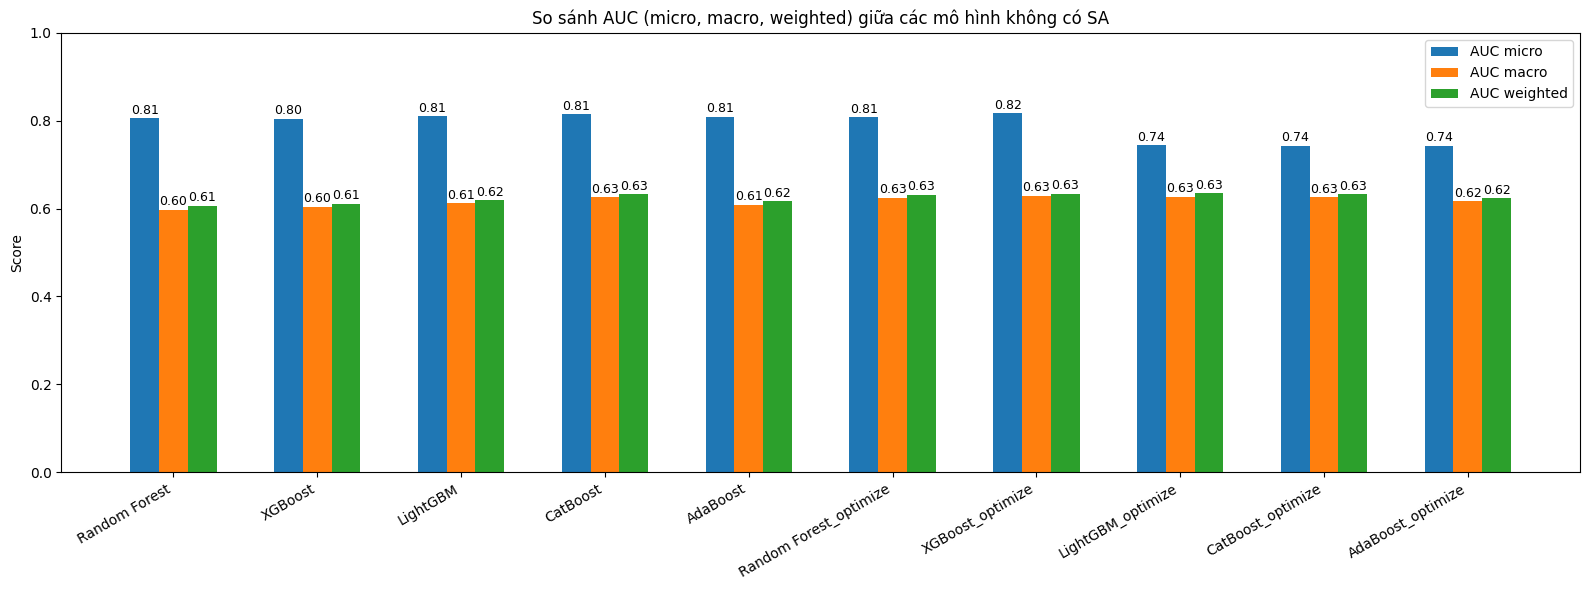

In [20]:
# Ví dụ với F1-score, bạn có thể làm tương tự cho Precision, Recall, AUC
metrics_dict = {
    "F1": [f1_micro_scores_no_sa, f1_macro_scores_no_sa, f1_weighted_scores_no_sa],
    "Precision": [precision_micro_scores_no_sa, precision_macro_scores_no_sa, precision_weighted_scores_no_sa],
    "Recall": [recall_micro_scores_no_sa, recall_macro_scores_no_sa, recall_weighted_scores_no_sa],
    "AUC": [auc_micro_scores_no_sa, auc_macro_scores_no_sa, auc_weighted_scores_no_sa]
}
metric_names = ["F1", "Precision", "Recall", "AUC"]
score_types = ["micro", "macro", "weighted"]
x = np.arange(len(model_names))
width = 0.2

for metric, scores_list in metrics_dict.items():
    plt.figure(figsize=(16, 6))
    for i, scores in enumerate(scores_list):
        plt.bar(x + i*width - width, scores, width, label=f"{metric} {score_types[i]}")
        for j, v in enumerate(scores):
            plt.text(j + i*width - width, v + 0.01, f"{v:.2f}", ha='center', color='black', fontsize=9)
    plt.xticks(x, model_names, rotation=30, ha='right')
    plt.ylim(0, 1)
    plt.ylabel('Score')
    plt.title(f"So sánh {metric} (micro, macro, weighted) giữa các mô hình không có SA")
    plt.legend()
    plt.tight_layout()
    plt.show()

Evaluate with ta + fa + sa data

In [21]:
# Danh sách các mô hình
models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced_subsample'),
    "XGBoost": XGBClassifier(n_jobs=-1, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(n_jobs=-1, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Random Forest_optimize": RandomForestClassifier(
        n_jobs=-1,
        random_state=42,
        class_weight='balanced_subsample',
        n_estimators= 686,
        max_depth = 27,
        min_samples_split = 12, 
        min_samples_leaf = 6, 
        max_features = 'sqrt'
        
    ),
    "XGBoost_optimize": XGBClassifier(
        n_jobs=-1,
        random_state=42, 
        use_label_encoder=False, 
        eval_metric='mlogloss',
        n_estimators = 509,
        max_depth = 15, 
        learning_rate = 0.010573037641604782, 
        subsample = 0.7696713618575721, 
        colsample_bytree = 0.34739691940731654
    ),
    "LightGBM_optimize": LGBMClassifier(
        class_weight = "balanced",
        objective = "multiclass",
        metric = "multi_logloss",
        verbosity = -1,
        random_state = 42,
        n_jobs = -1,
        n_estimators = 488, 
        max_depth = 16, 
        learning_rate = 0.010304172272245919, 
        num_leaves = 135, 
        subsample = 0.9539484209180064, 
        colsample_bytree = 0.20347358093479598, 
        min_child_samples = 97
    ),
    "CatBoost_optimize": CatBoostClassifier(
        verbose=0,
        auto_class_weights = "Balanced",  # giúp giảm mất cân bằng lớp
        loss_function = "MultiClass",
        eval_metric = "MultiClass",
        random_seed = 42,
        iterations = 995,
        depth = 8, 
        learning_rate = 0.014141428456986765, 
        l2_leaf_reg = 5.540109008031062, 
        bagging_temperature = 0.8775942516652349, 
        random_strength = 0.009807881231376103, 
        border_count = 91
    ),
    "AdaBoost_optimize": AdaBoostClassifier(
        random_state=42,
        n_estimators = 397, 
        learning_rate = 0.010340757975254994, 
        algorithm = 'SAMME', 
        estimator = DecisionTreeClassifier(max_depth=3, class_weight="balanced"),
    ),
}

In [14]:

X_train_with_sa = df_global_train[features]  # features = ta + fa + sa
X_test_with_sa = df_global_test[features]

scaler = StandardScaler()
X_train_with_sa_scaled = scaler.fit_transform(X_train_with_sa)   # Fit scaler trên train, scale train luôn
X_test_with_sa_scaled = scaler.transform(X_test_with_sa)  

In [23]:
# Đánh giá với bộ feature có SA (ta + fa + sa)
print("Đánh giá với bộ feature có SA (ta + fa +sa)")
model_names, \
f1_weighted_scores_with_sa, f1_micro_scores_with_sa, \
f1_macro_scores_with_sa, acc_scores_with_sa, \
auc_micro_scores_with_sa, auc_weighted_scores_with_sa, auc_macro_scores_with_sa, \
precision_micro_scores_with_sa, precision_macro_scores_with_sa, precision_weighted_scores_with_sa, \
recall_micro_scores_with_sa, recall_macro_scores_with_sa, recall_weighted_scores_with_sa, \
roc_data_with_sa = evaluate_models(
    X_train_with_sa_scaled, X_test_with_sa_scaled, y_train, y_test, models
)

Đánh giá với bộ feature có SA (ta + fa +sa)
Random Forest Test F1 (weighted): 0.5775
Random Forest Test F1 (micro)   : 0.6932
Random Forest Test F1 (macro)   : 0.2941
Random Forest Test Accuracy     : 0.6932
Random Forest Precision (micro/macro/weighted): 0.6932 / 0.5026 / 0.6064
Random Forest Recall (micro/macro/weighted): 0.6932 / 0.3418 / 0.6932
              precision    recall  f1-score   support

           0       0.27      0.01      0.02      1164
           1       0.70      0.99      0.82      5118
           2       0.55      0.02      0.04      1098

    accuracy                           0.69      7380
   macro avg       0.50      0.34      0.29      7380
weighted avg       0.61      0.69      0.58      7380

Random Forest ROC AUC (micro ovr): 0.8081
Random Forest ROC AUC (weighted ovr): 0.6105
Random Forest ROC AUC (macro ovr): 0.6040


[15:23:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost Test F1 (weighted): 0.5950
XGBoost Test F1 (micro)   : 0.6753
XGBoost Test F1 (macro)   : 0.3439
XGBoost Test Accuracy     : 0.6753
XGBoost Precision (micro/macro/weighted): 0.6753 / 0.4224 / 0.5766
XGBoost Recall (micro/macro/weighted): 0.6753 / 0.3607 / 0.6753
              precision    recall  f1-score   support

           0       0.26      0.07      0.10      1164
           1       0.71      0.94      0.81      5118
           2       0.29      0.07      0.12      1098

    accuracy                           0.68      7380
   macro avg       0.42      0.36      0.34      7380
weighted avg       0.58      0.68      0.59      7380

XGBoost ROC AUC (micro ovr): 0.8078
XGBoost ROC AUC (weighted ovr): 0.6175
XGBoost ROC AUC (macro ovr): 0.6137
LightGBM Test F1 (weighted): 0.5901
LightGBM Test F1 (micro)   : 0.6862
LightGBM Test F1 (macro)   : 0.3252
LightGBM Test Accuracy     : 0.6862
LightGBM Precision (micro/macro/weighted): 0.6862 / 0.4386 / 0.5823
LightGBM Recall (micro/ma

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


AdaBoost Test F1 (weighted): 0.5870
AdaBoost Test F1 (micro)   : 0.6920
AdaBoost Test F1 (macro)   : 0.3151
AdaBoost Test Accuracy     : 0.6920
AdaBoost Precision (micro/macro/weighted): 0.6920 / 0.4777 / 0.5984
AdaBoost Recall (micro/macro/weighted): 0.6920 / 0.3506 / 0.6920
              precision    recall  f1-score   support

           0       0.34      0.03      0.05      1164
           1       0.70      0.98      0.82      5118
           2       0.39      0.04      0.07      1098

    accuracy                           0.69      7380
   macro avg       0.48      0.35      0.32      7380
weighted avg       0.60      0.69      0.59      7380

AdaBoost ROC AUC (micro ovr): 0.8104
AdaBoost ROC AUC (weighted ovr): 0.6211
AdaBoost ROC AUC (macro ovr): 0.6133
Random Forest_optimize Test F1 (weighted): 0.6063
Random Forest_optimize Test F1 (micro)   : 0.6779
Random Forest_optimize Test F1 (macro)   : 0.3670
Random Forest_optimize Test Accuracy     : 0.6779
Random Forest_optimize Preci

[15:27:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost_optimize Test F1 (weighted): 0.5795
XGBoost_optimize Test F1 (micro)   : 0.6921
XGBoost_optimize Test F1 (macro)   : 0.3000
XGBoost_optimize Test Accuracy     : 0.6921
XGBoost_optimize Precision (micro/macro/weighted): 0.6921 / 0.4993 / 0.6058
XGBoost_optimize Recall (micro/macro/weighted): 0.6921 / 0.3440 / 0.6921
              precision    recall  f1-score   support

           0       0.37      0.02      0.03      1164
           1       0.70      0.99      0.82      5118
           2       0.43      0.03      0.05      1098

    accuracy                           0.69      7380
   macro avg       0.50      0.34      0.30      7380
weighted avg       0.61      0.69      0.58      7380

XGBoost_optimize ROC AUC (micro ovr): 0.8195
XGBoost_optimize ROC AUC (weighted ovr): 0.6397
XGBoost_optimize ROC AUC (macro ovr): 0.6355
LightGBM_optimize Test F1 (weighted): 0.6127
LightGBM_optimize Test F1 (micro)   : 0.6217
LightGBM_optimize Test F1 (macro)   : 0.4307
LightGBM_optimize Tes

SO SÁNH GIỮA BASE MODEL VÀ OPTIMIZED MODEL DỰA TRÊN CÁC TIÊU CHÍ TRƯỜNG HỢP CÓ SENTIMENT ANALYSIS

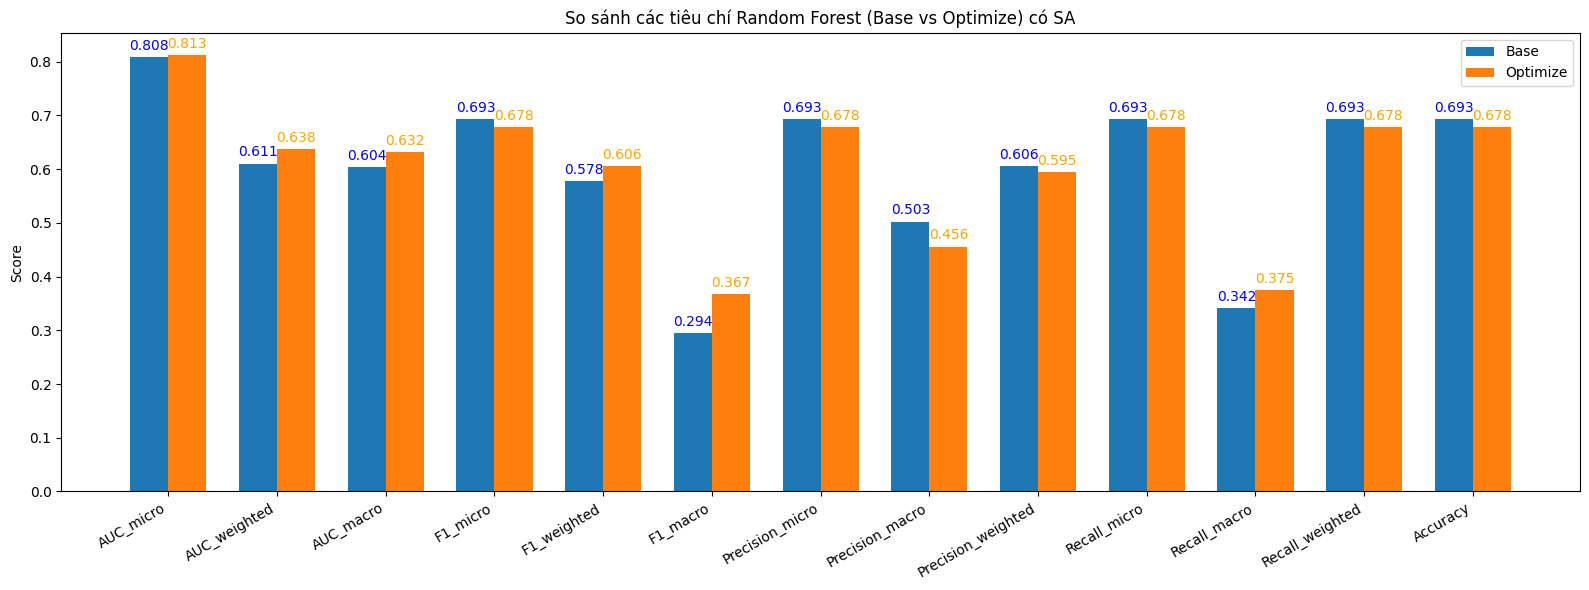

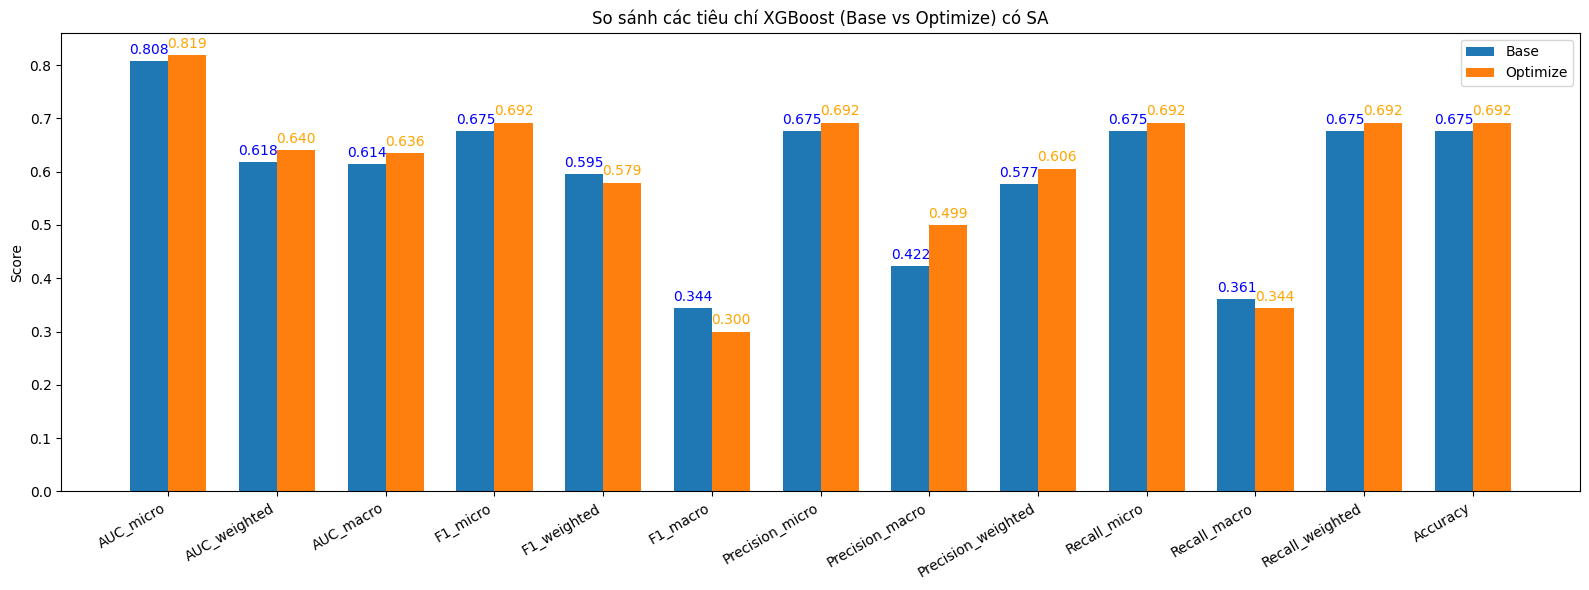

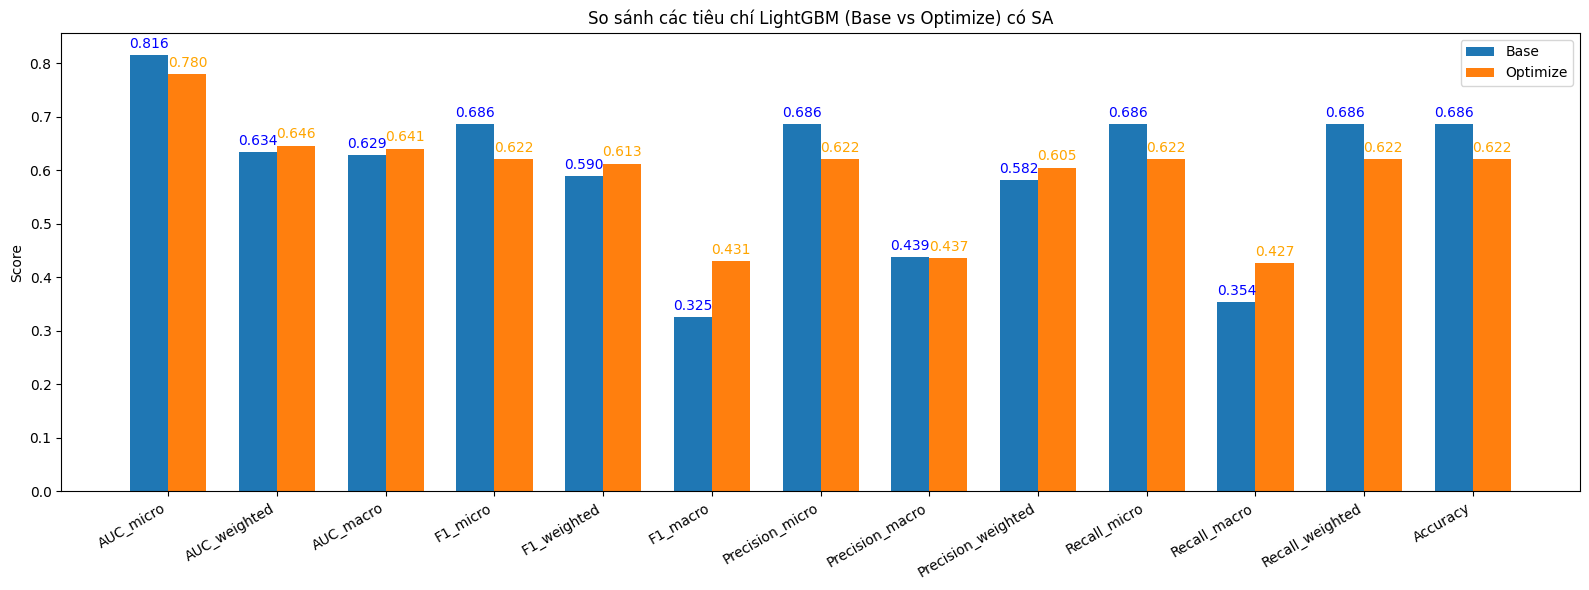

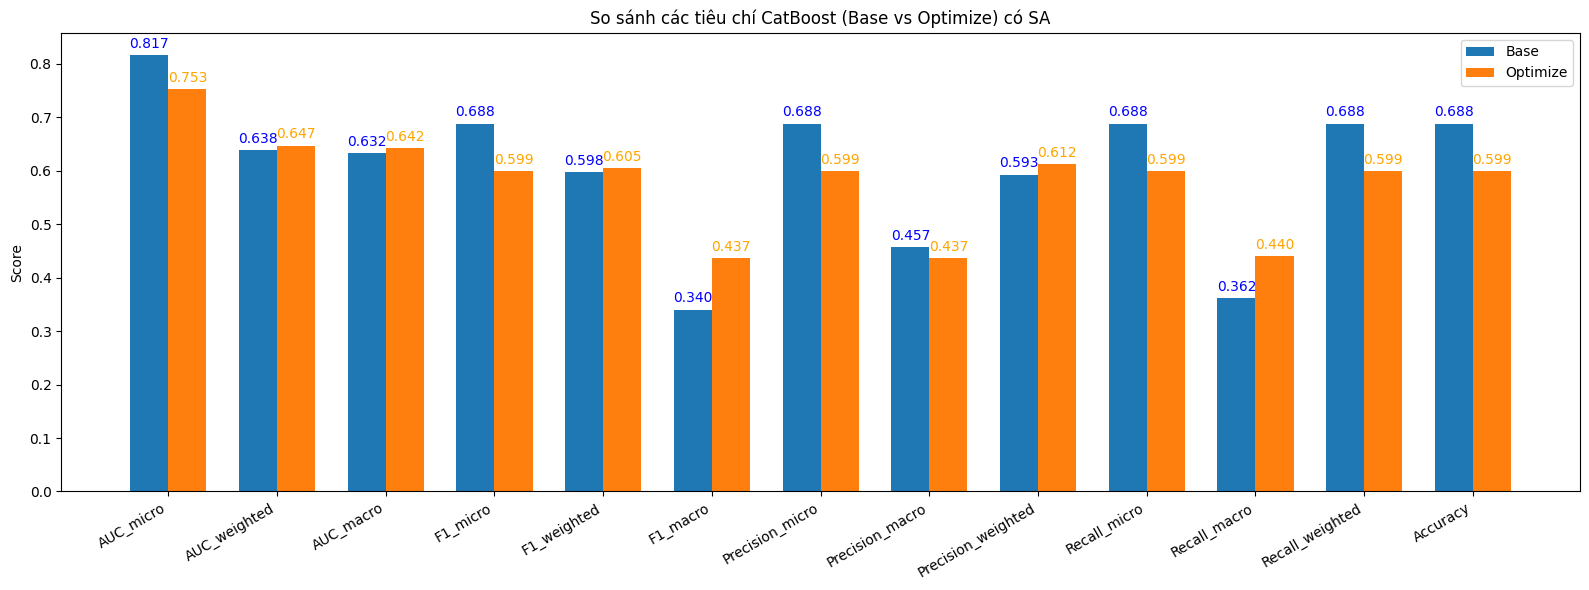

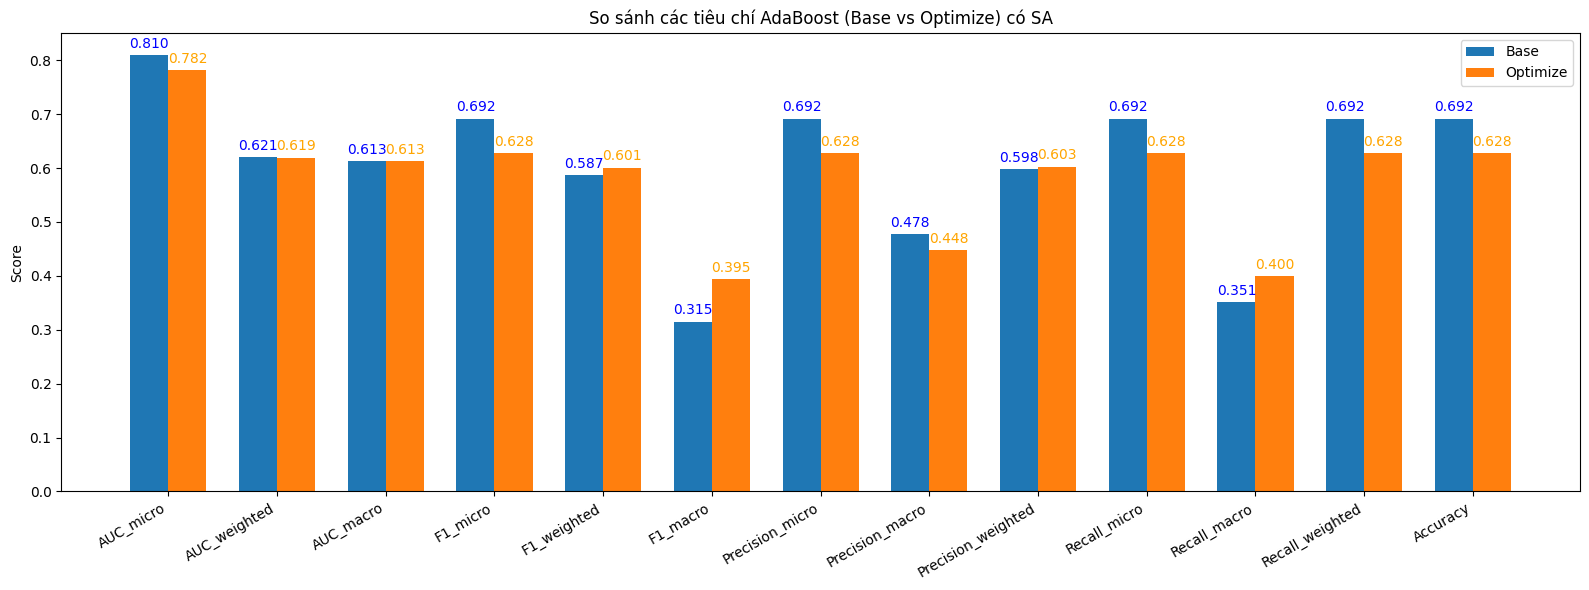

In [24]:
for base_name, opt_name in base_optimize_pairs:
    try:
        idx_base = model_names.index(base_name)
        idx_opt = model_names.index(opt_name)
    except ValueError:
        continue

    metrics = {
        "AUC_micro": [auc_micro_scores_with_sa[idx_base], auc_micro_scores_with_sa[idx_opt]],
        "AUC_weighted": [auc_weighted_scores_with_sa[idx_base], auc_weighted_scores_with_sa[idx_opt]],
        "AUC_macro": [auc_macro_scores_with_sa[idx_base], auc_macro_scores_with_sa[idx_opt]],
        "F1_micro": [f1_micro_scores_with_sa[idx_base], f1_micro_scores_with_sa[idx_opt]],
        "F1_weighted": [f1_weighted_scores_with_sa[idx_base], f1_weighted_scores_with_sa[idx_opt]],
        "F1_macro": [f1_macro_scores_with_sa[idx_base], f1_macro_scores_with_sa[idx_opt]],
        "Precision_micro": [precision_micro_scores_with_sa[idx_base], precision_micro_scores_with_sa[idx_opt]],
        "Precision_macro": [precision_macro_scores_with_sa[idx_base], precision_macro_scores_with_sa[idx_opt]],
        "Precision_weighted": [precision_weighted_scores_with_sa[idx_base], precision_weighted_scores_with_sa[idx_opt]],
        "Recall_micro": [recall_micro_scores_with_sa[idx_base], recall_micro_scores_with_sa[idx_opt]],
        "Recall_macro": [recall_macro_scores_with_sa[idx_base], recall_macro_scores_with_sa[idx_opt]],
        "Recall_weighted": [recall_weighted_scores_with_sa[idx_base], recall_weighted_scores_with_sa[idx_opt]],
        "Accuracy": [acc_scores_with_sa[idx_base], acc_scores_with_sa[idx_opt]],
    }

    labels = list(metrics.keys())
    base_scores = [v[0] for v in metrics.values()]
    opt_scores = [v[1] for v in metrics.values()]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(16, 6))
    bars1 = ax.bar(x - width/2, base_scores, width, label='Base')
    bars2 = ax.bar(x + width/2, opt_scores, width, label='Optimize')

    # Thêm số liệu trên đầu cột
    for bar in bars1:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    color='blue')
    for bar in bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    color='orange')

    ax.set_ylabel('Score')
    ax.set_title(f'So sánh các tiêu chí {base_name} (Base vs Optimize) có SA')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=30, ha='right')
    ax.legend()
    plt.tight_layout()
    plt.show()

SO SÁNH CÁC TIÊU CHÍ TRÊN CÁC MÔ HÌNH KHÁC NHAU TRƯỜNG HỢP CÓ SENTIMENT ANALYSIS

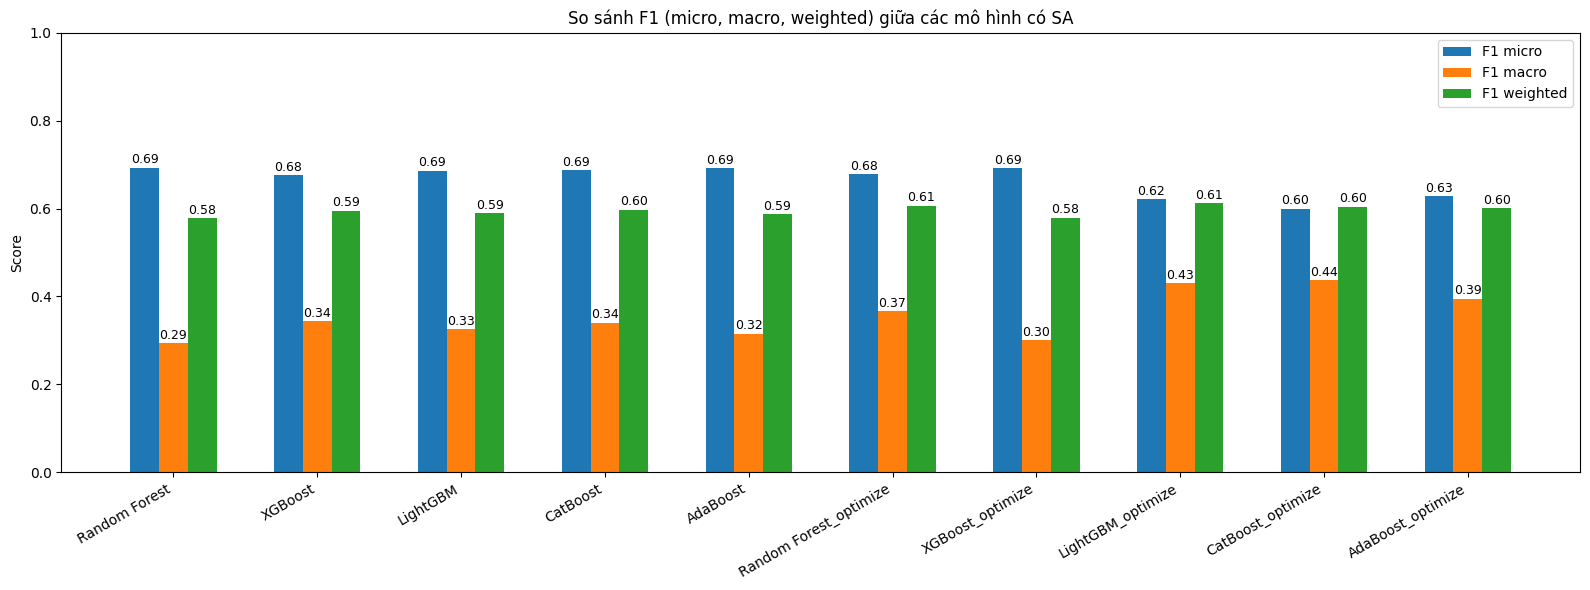

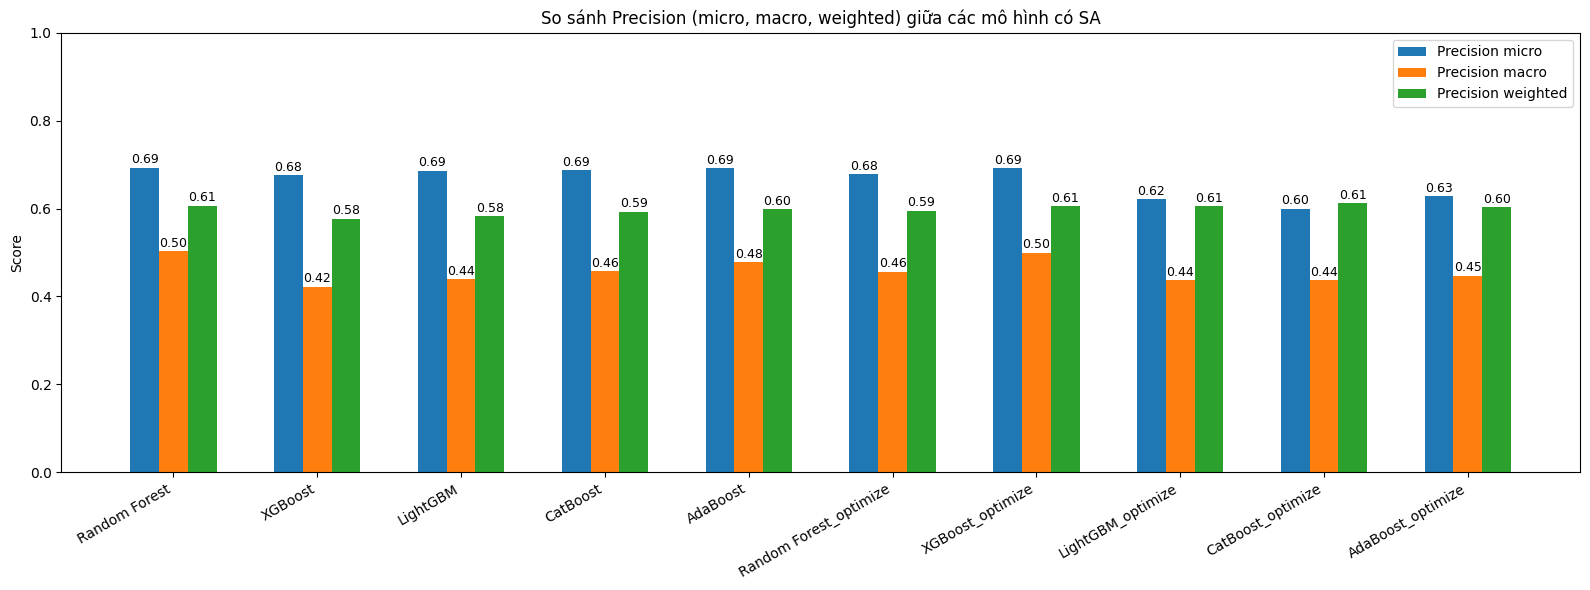

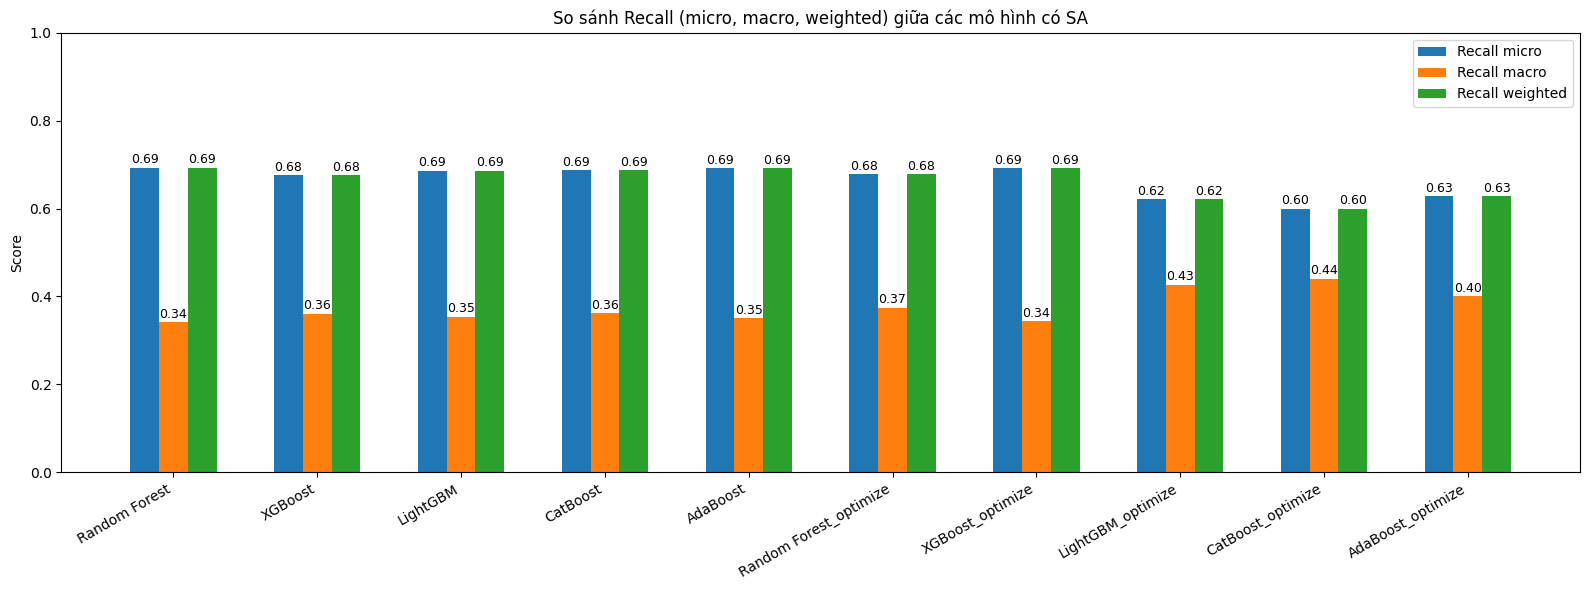

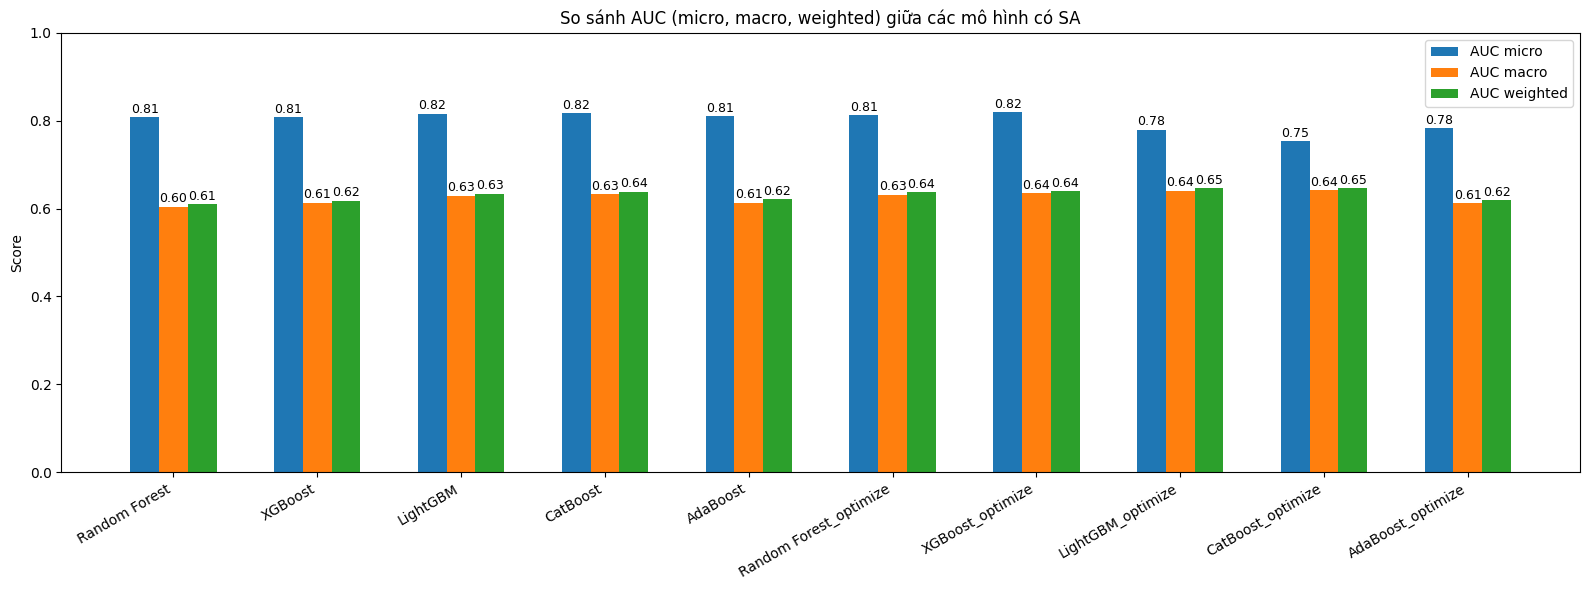

In [25]:
# Ví dụ với F1-score, bạn có thể làm tương tự cho Precision, Recall, AUC
metrics_dict = {
    "F1": [f1_micro_scores_with_sa, f1_macro_scores_with_sa, f1_weighted_scores_with_sa],
    "Precision": [precision_micro_scores_with_sa, precision_macro_scores_with_sa, precision_weighted_scores_with_sa],
    "Recall": [recall_micro_scores_with_sa, recall_macro_scores_with_sa, recall_weighted_scores_with_sa],
    "AUC": [auc_micro_scores_with_sa, auc_macro_scores_with_sa, auc_weighted_scores_with_sa]
}

metric_names = ["F1", "Precision", "Recall", "AUC"]
score_types = ["micro", "macro", "weighted"]
x = np.arange(len(model_names))
width = 0.2

for metric, scores_list in metrics_dict.items():
    plt.figure(figsize=(16, 6))
    for i, scores in enumerate(scores_list):
        plt.bar(x + i*width - width, scores, width, label=f"{metric} {score_types[i]}")
        for j, v in enumerate(scores):
            plt.text(j + i*width - width, v + 0.01, f"{v:.2f}", ha='center', color='black', fontsize=9)
    plt.xticks(x, model_names, rotation=30, ha='right')
    plt.ylim(0, 1)
    plt.ylabel('Score')
    plt.title(f"So sánh {metric} (micro, macro, weighted) giữa các mô hình có SA")
    plt.legend()
    plt.tight_layout()
    plt.show()

SO SÁNH CÁC CHỈ SỐ GIỮA MÔ HÌNH CÓ VÀ KHÔNG SỬ DỤNG SENTIMENT ANALYSIS

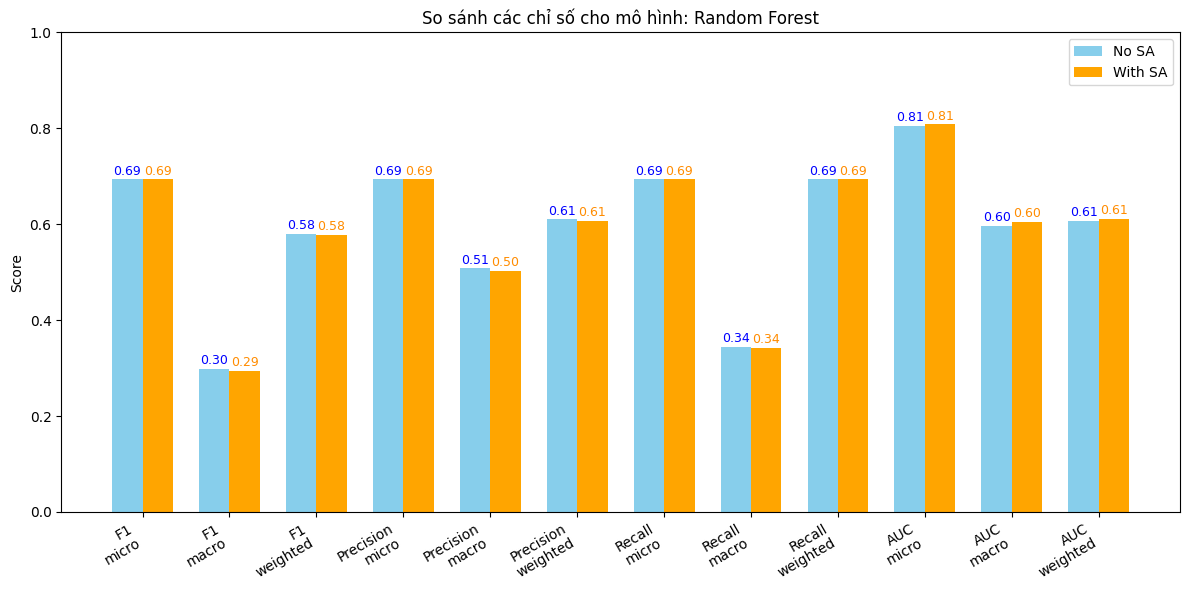

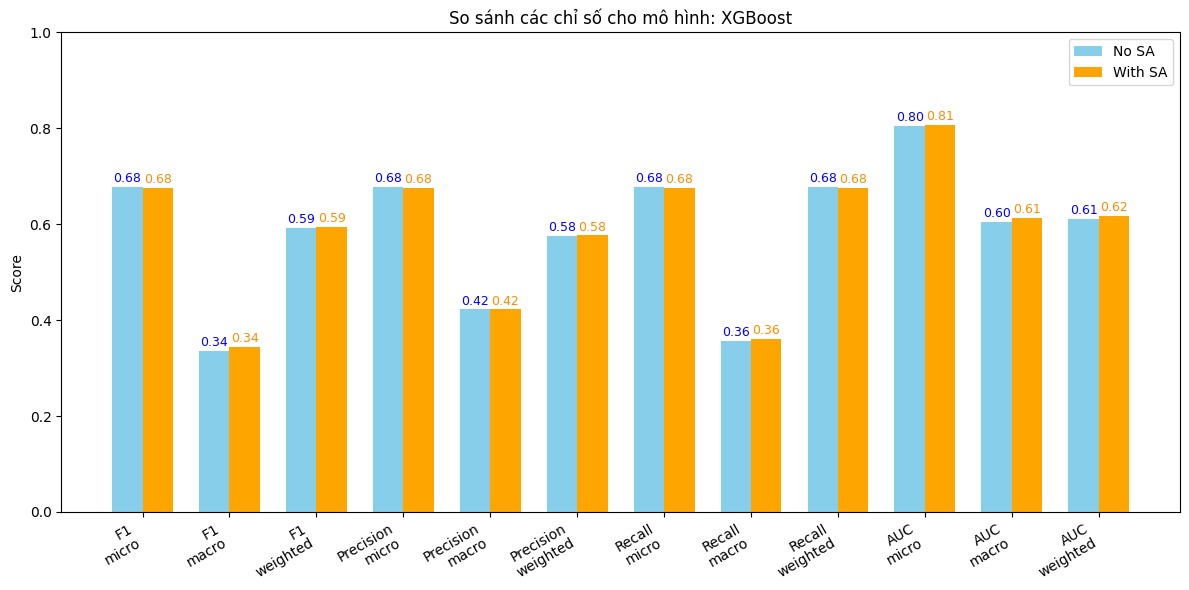

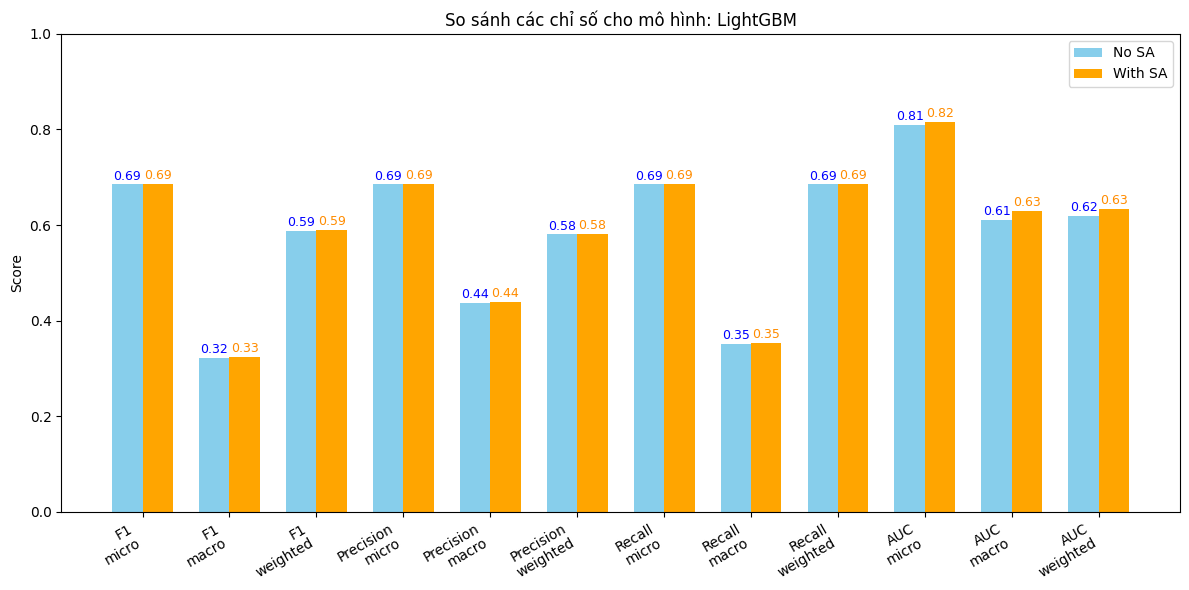

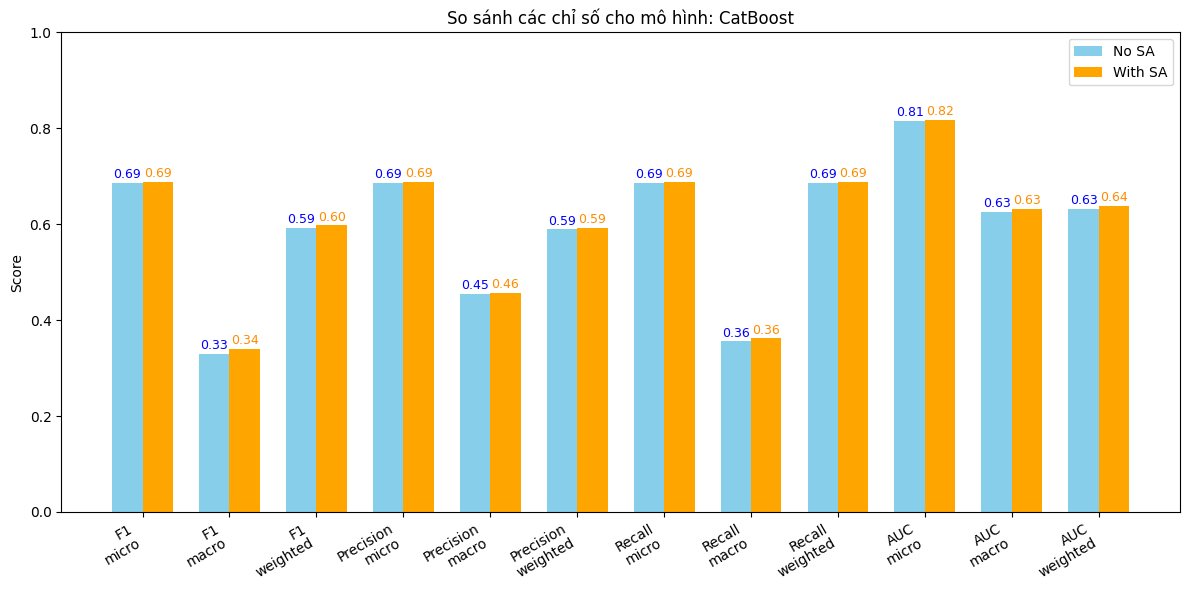

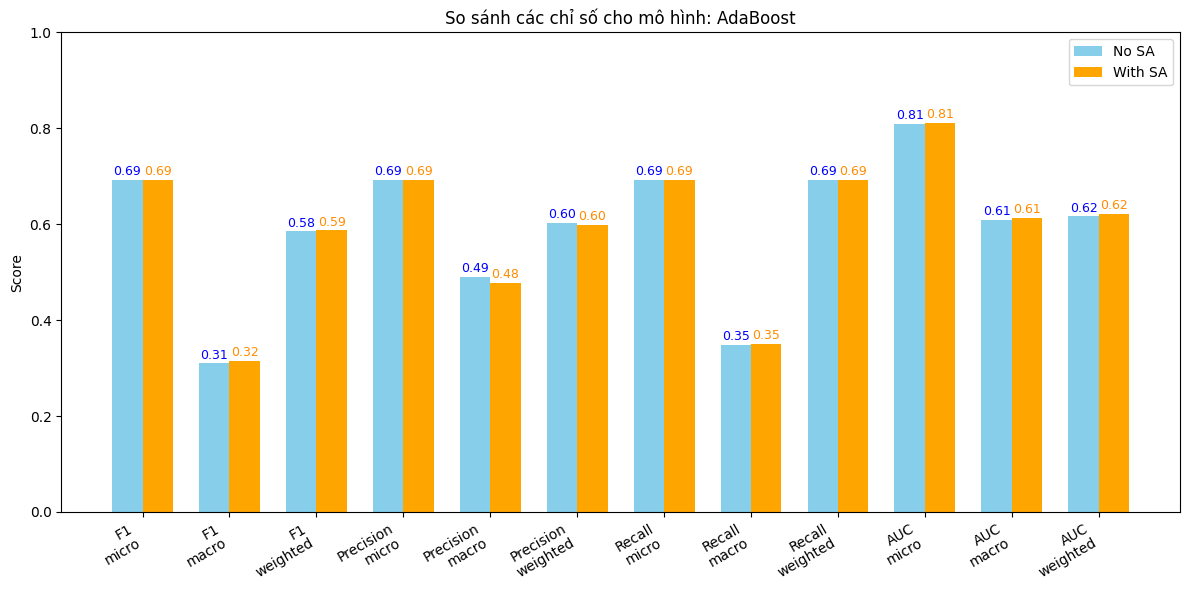

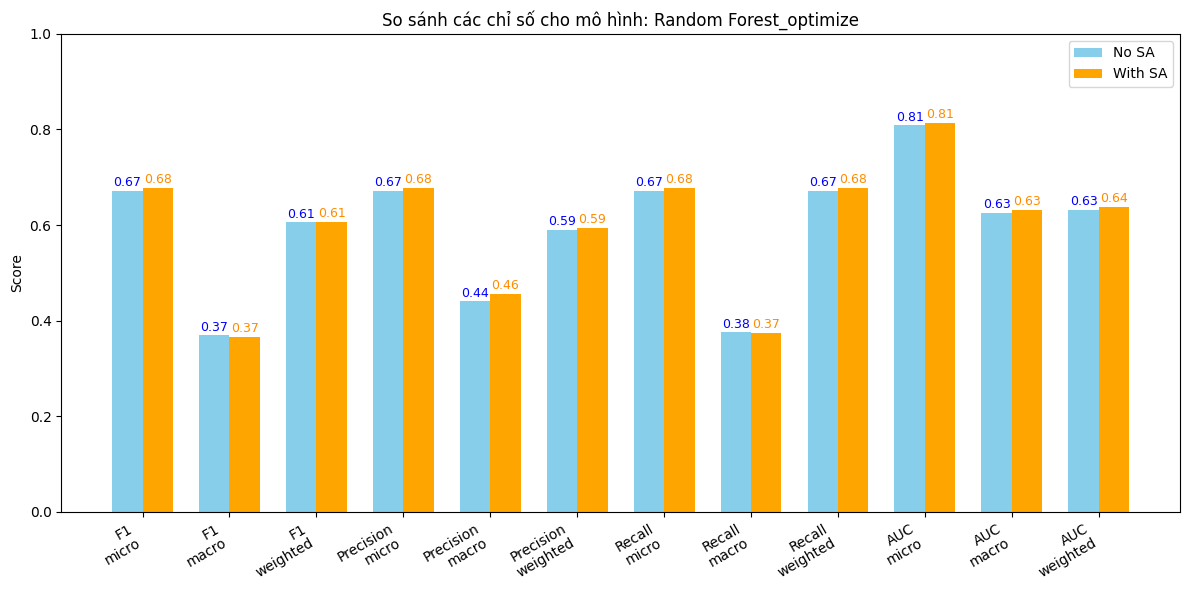

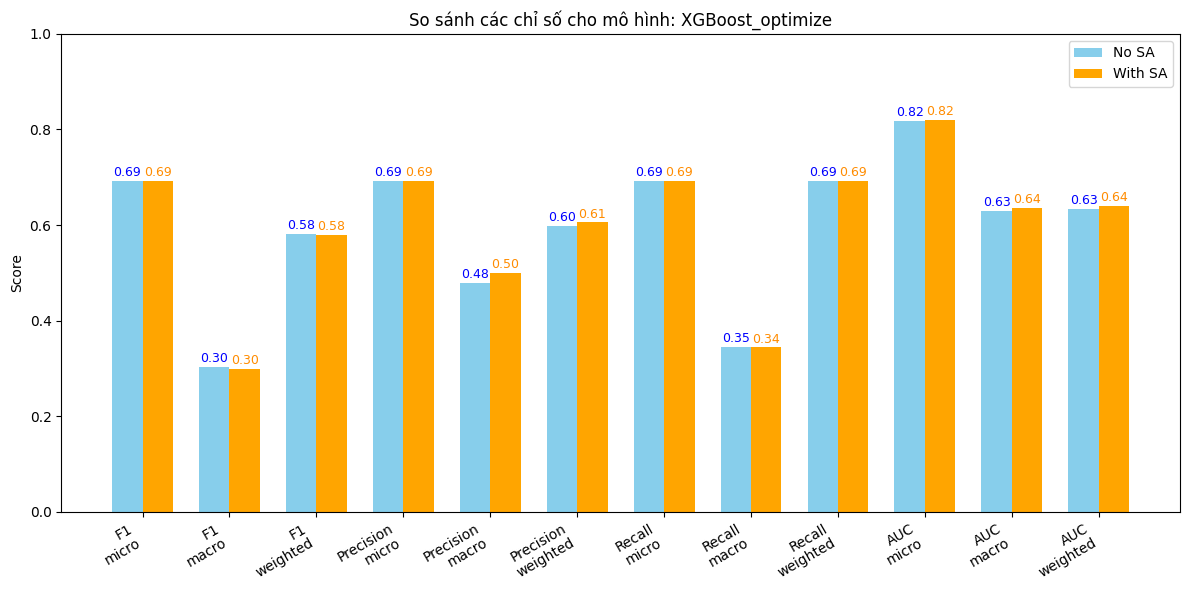

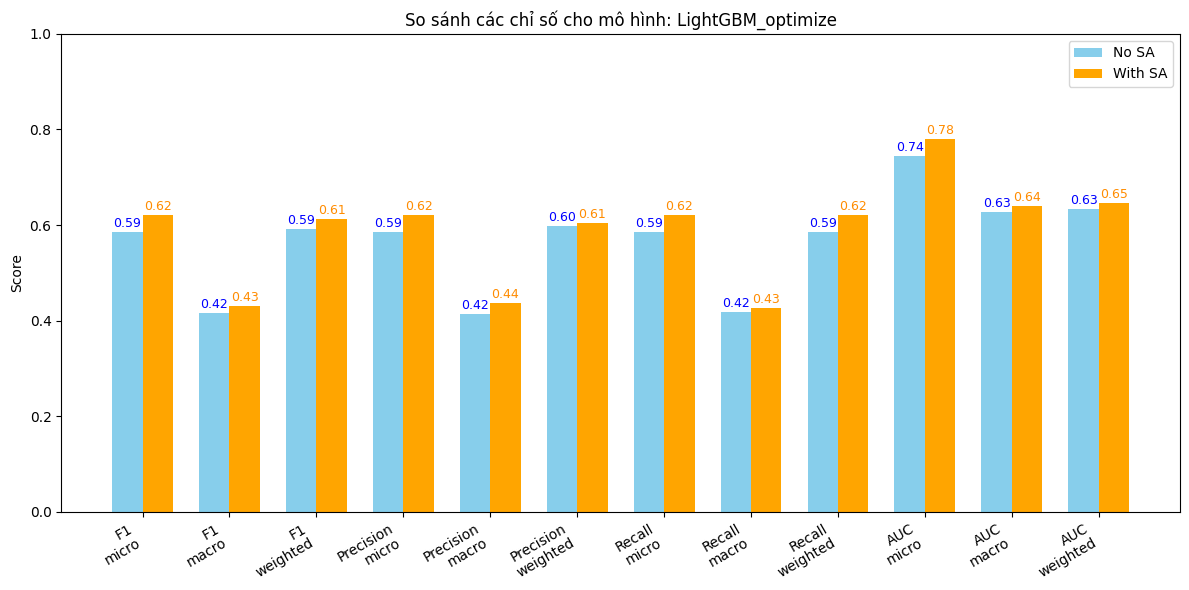

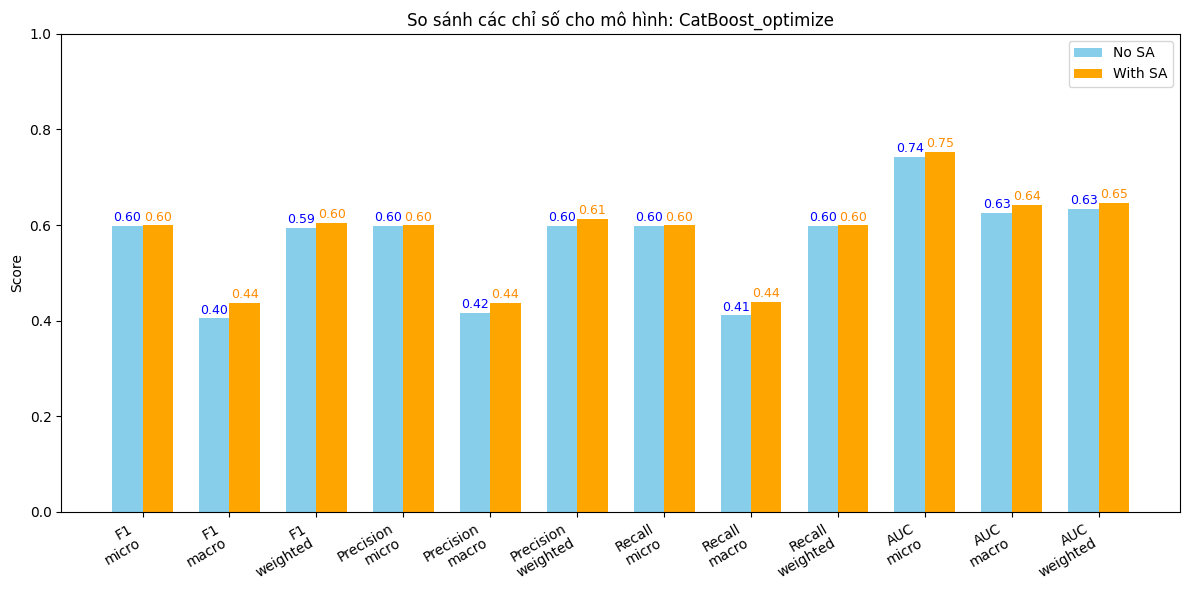

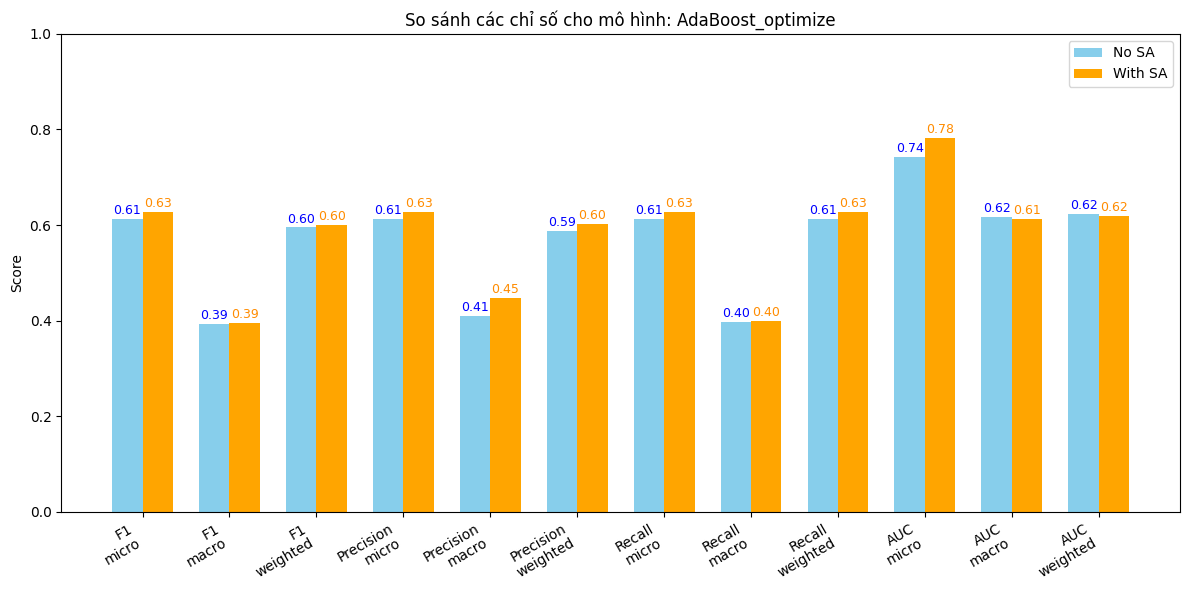

In [26]:
metrics_dict = {
    "F1": (f1_micro_scores_no_sa, f1_macro_scores_no_sa, f1_weighted_scores_no_sa,
           f1_micro_scores_with_sa, f1_macro_scores_with_sa, f1_weighted_scores_with_sa),
    "Precision": (precision_micro_scores_no_sa, precision_macro_scores_no_sa, precision_weighted_scores_no_sa,
                  precision_micro_scores_with_sa, precision_macro_scores_with_sa, precision_weighted_scores_with_sa),
    "Recall": (recall_micro_scores_no_sa, recall_macro_scores_no_sa, recall_weighted_scores_no_sa,
               recall_micro_scores_with_sa, recall_macro_scores_with_sa, recall_weighted_scores_with_sa),
    "AUC": (auc_micro_scores_no_sa, auc_macro_scores_no_sa, auc_weighted_scores_no_sa,
            auc_micro_scores_with_sa, auc_macro_scores_with_sa, auc_weighted_scores_with_sa),
}

score_types = ["micro", "macro", "weighted"]

for idx, model_name in enumerate(model_names):
    fig, ax = plt.subplots(figsize=(12, 6))
    n_metrics = len(metrics_dict)
    n_types = len(score_types)
    total_bars = n_metrics * n_types

    bar_width = 0.35
    x = np.arange(total_bars)

    values_no_sa = []
    values_with_sa = []
    xtick_labels = []

    # Gom dữ liệu và nhãn
    for metric, scores in metrics_dict.items():
        for i, st in enumerate(score_types):
            values_no_sa.append(scores[i][idx])
            values_with_sa.append(scores[i+3][idx])
            xtick_labels.append(f"{metric}\n{st}")

    # Vẽ cột
    bars1 = ax.bar(x - bar_width/2, values_no_sa, bar_width, label='No SA', color='skyblue')
    bars2 = ax.bar(x + bar_width/2, values_with_sa, bar_width, label='With SA', color='orange')

    # Annotate
    for bar in bars1:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width()/2, height+0.01), ha='center', color='blue', fontsize=9)
    for bar in bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width()/2, height+0.01), ha='center', color='darkorange', fontsize=9)

    ax.set_xticks(x)
    ax.set_xticklabels(xtick_labels, rotation=30, ha='right')
    ax.set_ylim(0, 1)
    ax.set_ylabel('Score')
    ax.set_title(f"So sánh các chỉ số cho mô hình: {model_name}")
    ax.legend()
    plt.tight_layout()
    plt.show()

EXPLAIN FEATURES FOR STOCK TREND PREDICTION

In [15]:
# Chọn X_train_with_sa, y_train nếu muốn giải thích mô hình có SA
model = XGBClassifier(
    n_jobs=-1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=509,
    max_depth=15,
    learning_rate=0.010573037641604782,
    subsample=0.7696713618575721,
    colsample_bytree=0.34739691940731654
)
model.fit(X_train_with_sa_scaled, y_train)

[05:54:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.34739691940731654, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.010573037641604782,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=509, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

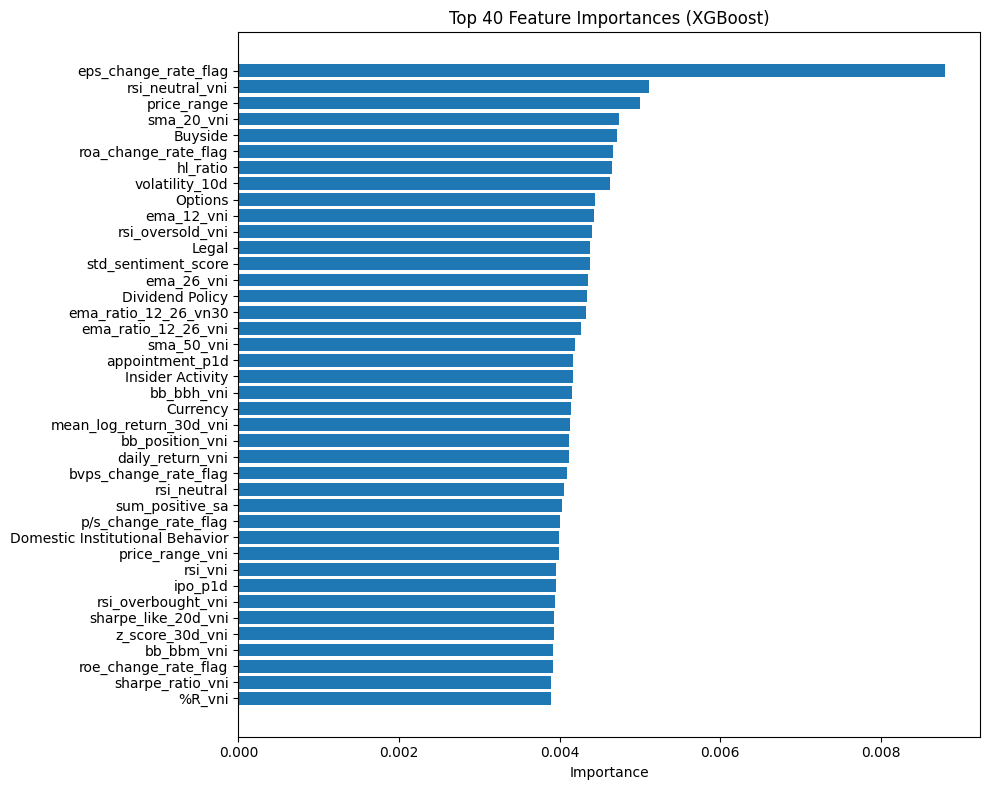

In [16]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train_with_sa.columns if isinstance(X_train_with_sa, pd.DataFrame) else features

plt.figure(figsize=(10, 8))
plt.title("Top 40 Feature Importances (XGBoost)")
plt.barh(range(40), importances[indices][:40][::-1], align="center")
plt.yticks(range(40), [feature_names[i] for i in indices][:40][::-1])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

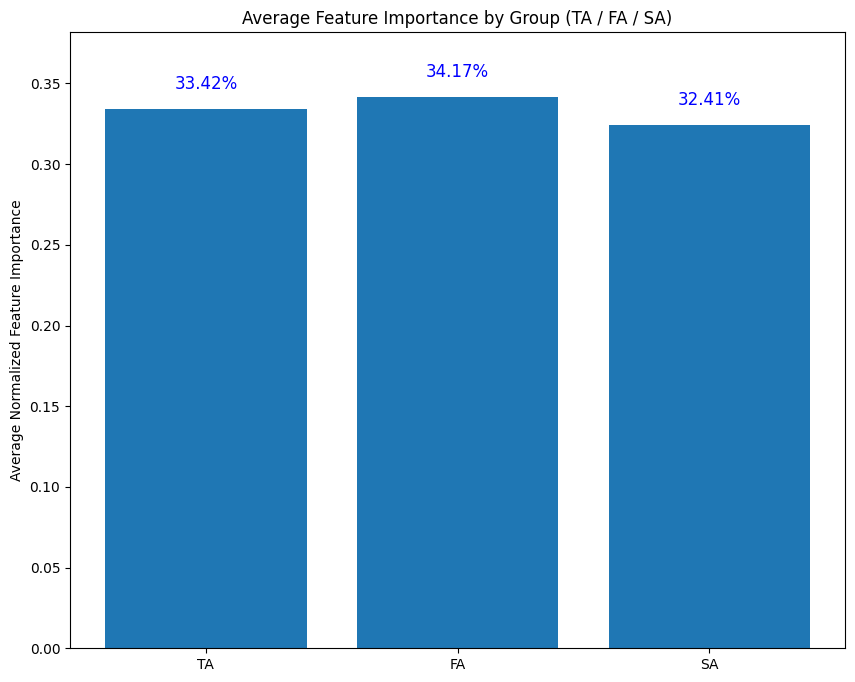

In [27]:
# Tạo mask cho từng nhóm
ta_mask = [f in ta_features for f in feature_names]
fa_mask = [f in fa_features for f in feature_names]
sa_mask = [f in sentiment_feature_selected for f in feature_names]

group_importance = {
    "TA": np.mean(importances[ta_mask]),
    "FA": np.mean(importances[fa_mask]),
    "SA": np.mean(importances[sa_mask])
}
plt.figure(figsize=(10, 8))  # hoặc (10, 8) tùy ý
total = sum(group_importance.values())
group_importance_norm = {k: v/total for k, v in group_importance.items()}
plt.bar(group_importance_norm.keys(), group_importance_norm.values())
plt.ylabel("Average Normalized Feature Importance")
plt.title("Average Feature Importance by Group (TA / FA / SA)")
for i, (k, v) in enumerate(group_importance_norm.items()):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center', va='bottom', fontsize=12, color='blue')
plt.ylim(0, max(group_importance_norm.values()) + 0.04)  # Đặt trục tung cao hơn để số nằm trong cột
plt.show()

In [18]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_with_sa_scaled)



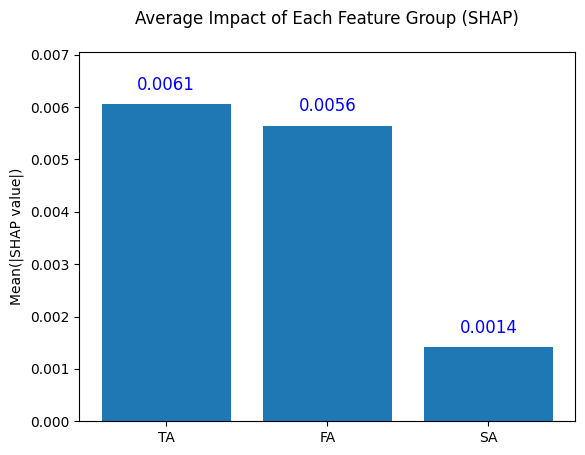

In [26]:
# Tổng hợp theo nhóm
def group_shap(shap_values, feature_names, ta_features, fa_features, sa_features):
    ta_idx = [i for i, f in enumerate(feature_names) if f in ta_features]
    fa_idx = [i for i, f in enumerate(feature_names) if f in fa_features]
    sa_idx = [i for i, f in enumerate(feature_names) if f in sa_features]
    ta_shap = np.abs(shap_values[:, ta_idx]).mean()
    fa_shap = np.abs(shap_values[:, fa_idx]).mean()
    sa_shap = np.abs(shap_values[:, sa_idx]).mean()
    return ta_shap, fa_shap, sa_shap

ta_shap, fa_shap, sa_shap = group_shap(shap_values, feature_names, ta_features, fa_features, sentiment_feature_selected)
plt.bar(["TA", "FA", "SA"], [ta_shap, fa_shap, sa_shap])
plt.ylabel("Mean(|SHAP value|)")
plt.title("Average Impact of Each Feature Group (SHAP)", pad=20)  # pad tăng khoảng cách tiêu đề
for i, v in enumerate([ta_shap, fa_shap, sa_shap]):
    plt.text(i, v + 0.0002, f"{v:.4f}", ha='center', va='bottom', fontsize=12, color='blue')
values = [ta_shap, fa_shap, sa_shap]  # Thêm dòng này
plt.ylim(0, max(values) + 0.001)  # Đặt trục tung cao hơn giá trị lớn nhất
plt.show()

In [20]:
# Đổi shape từ (n_sample, n_feature, n_class) -> (n_class, n_sample, n_feature)
shap_values_transposed = np.transpose(shap_values, (2, 0, 1))  # shape: (3, 35865, 282)

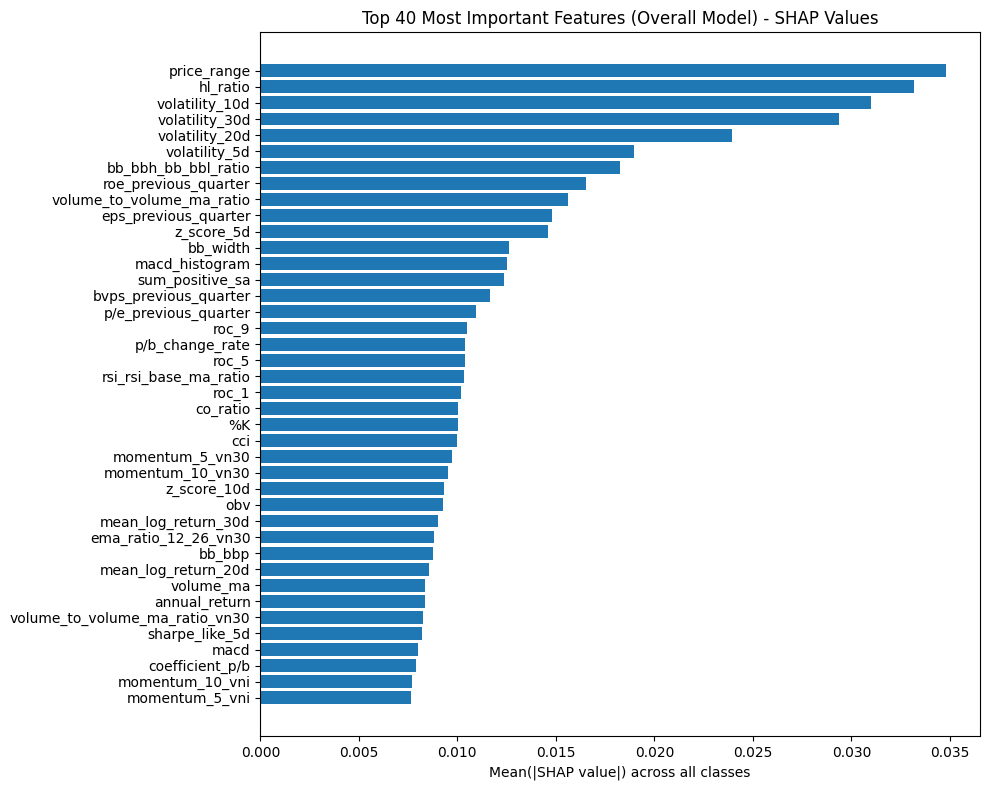

In [21]:
# Nếu shap_values_transposed có shape (n_class, n_sample, n_feature)
mean_shap = np.mean(np.abs(shap_values_transposed), axis=0)  # shape: (n_sample, n_feature)

# Sau đó lấy trung bình theo sample để ra importance cho từng feature
feature_importance = np.mean(mean_shap, axis=0)  # shape: (n_feature,)

# Vẽ top 40 feature
indices = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 8))
plt.barh(range(40), feature_importance[indices][:40][::-1], align="center")
plt.yticks(range(40), [feature_names[i] for i in indices][:40][::-1])
plt.xlabel("Mean(|SHAP value|) across all classes")
plt.title("Top 40 Most Important Features (Overall Model) - SHAP Values")
plt.tight_layout()
plt.show()

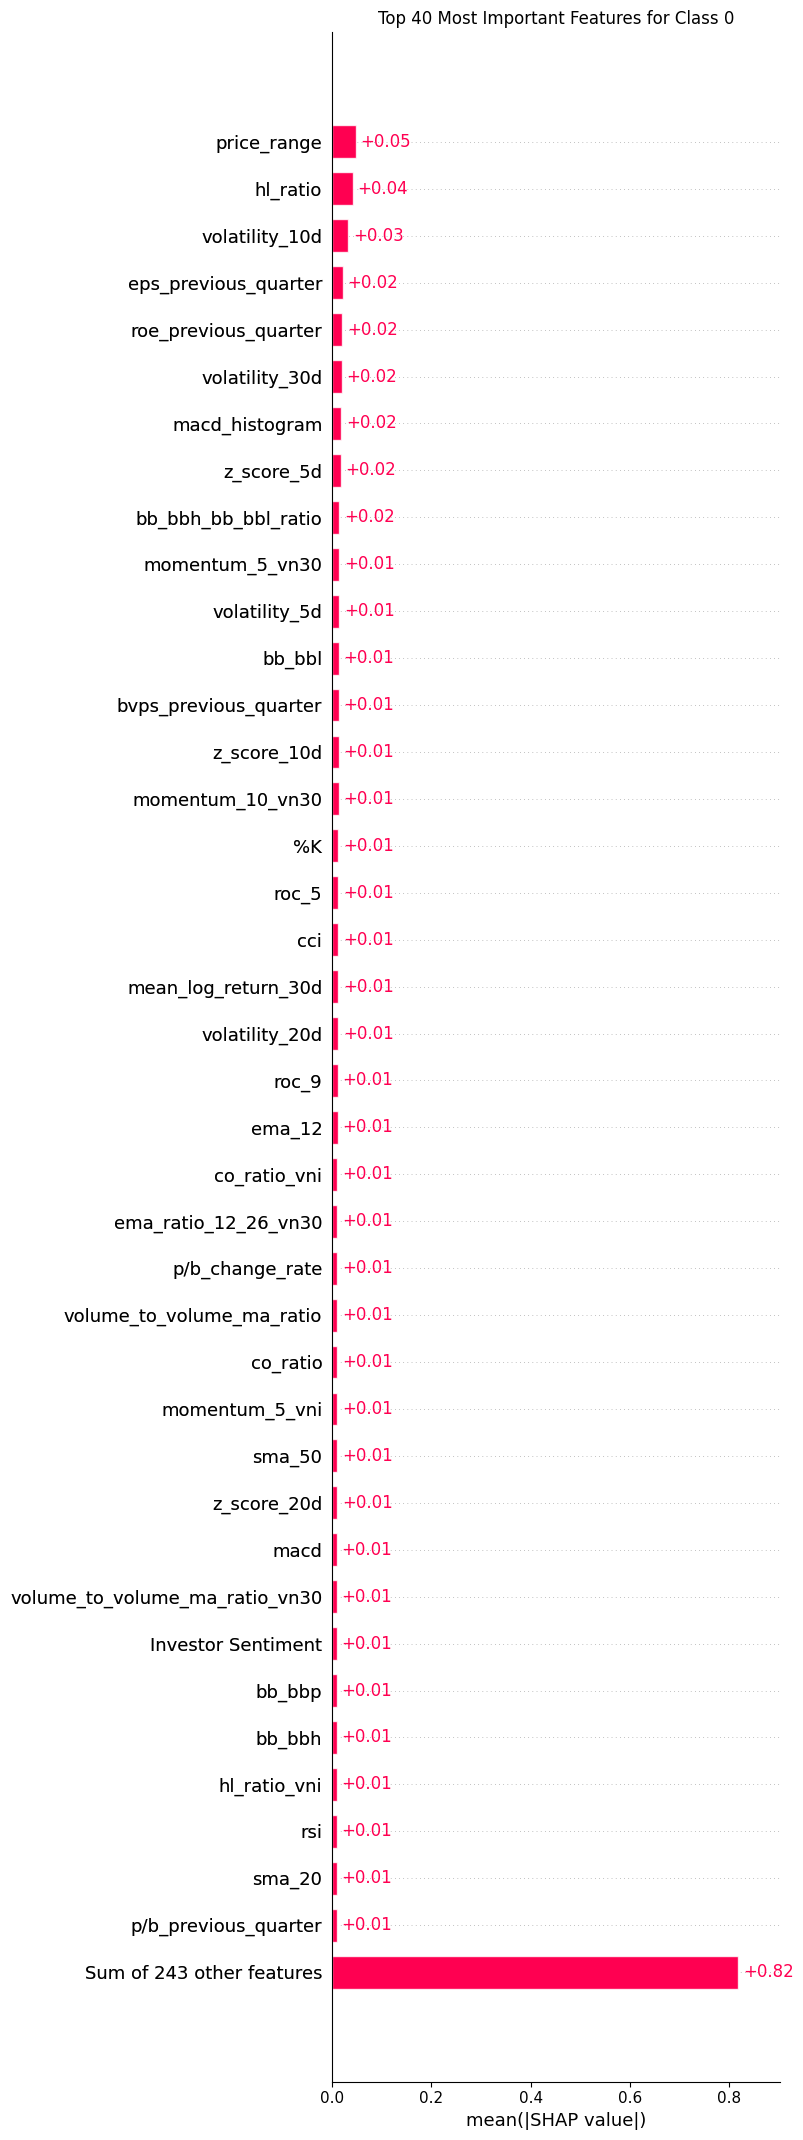

In [23]:
explanation = shap.Explanation(
    values=shap_values_transposed[0],
    base_values=explainer.expected_value[0],
    data=X_train_with_sa_scaled,
    feature_names=feature_names
)
ax = shap.plots.bar(explanation, max_display=40, show=False)  # show=False để tự đặt tiêu đề
plt.title("Top 40 Most Important Features for Class 0")
plt.tight_layout()
plt.show()

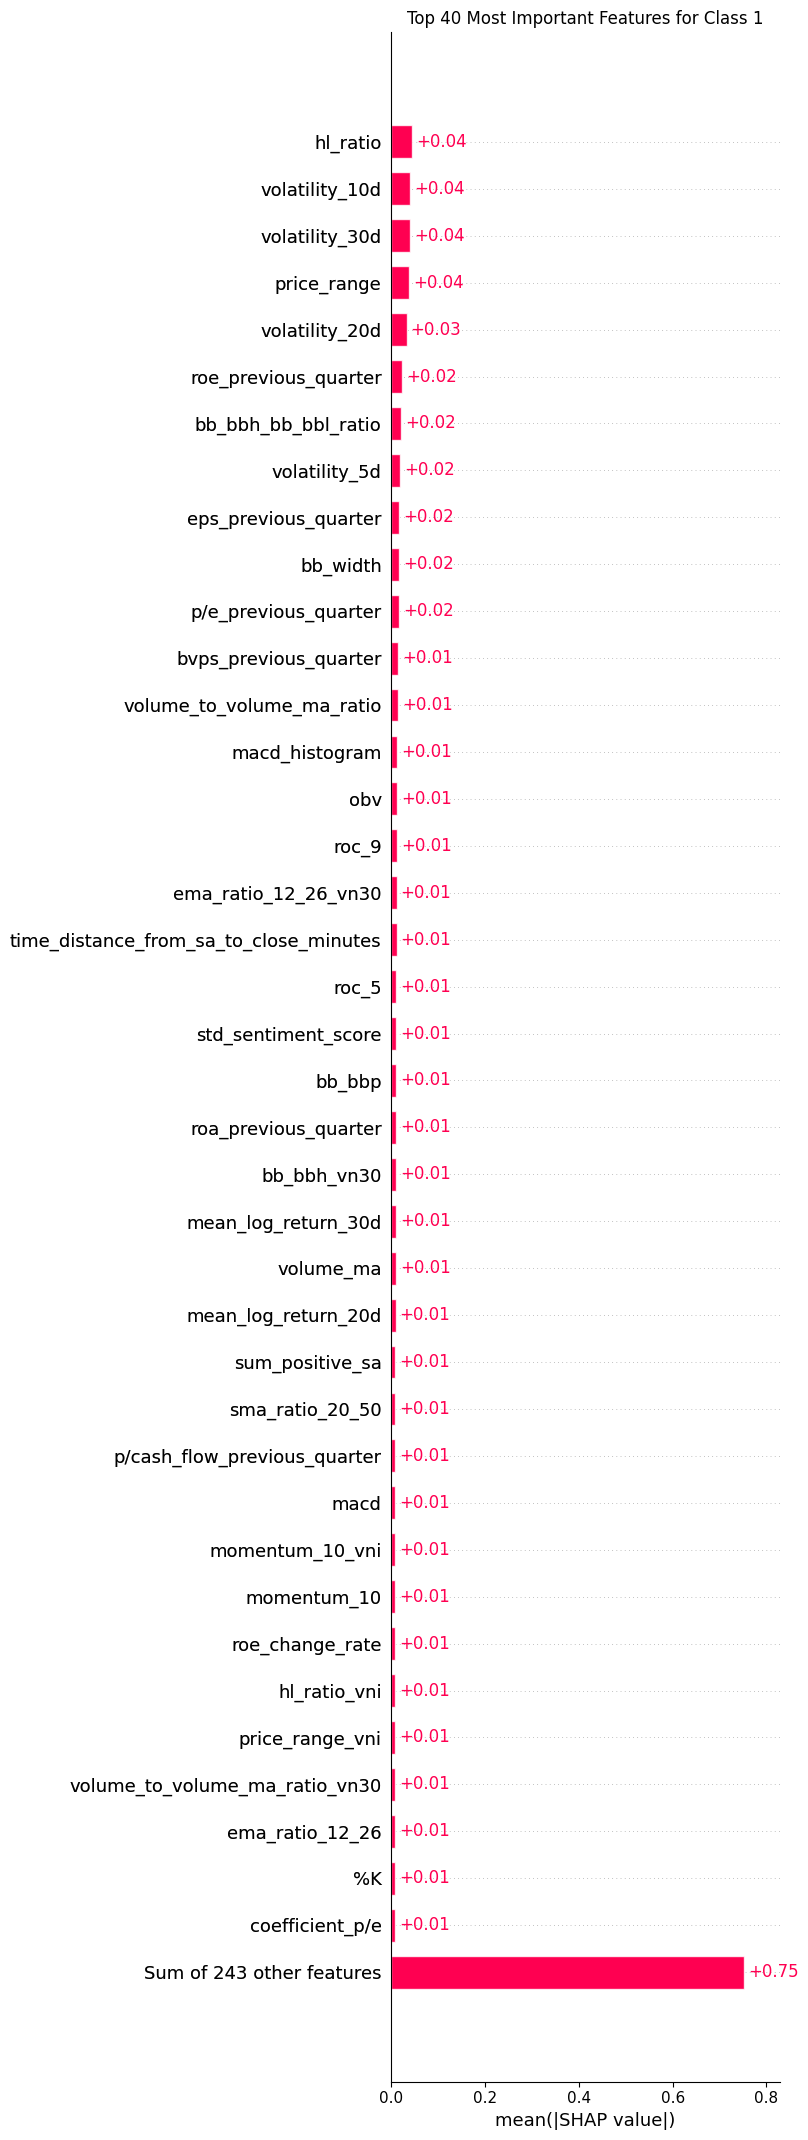

In [24]:
explanation = shap.Explanation(
    values=shap_values_transposed[1],
    base_values=explainer.expected_value[1],
    data=X_train_with_sa_scaled,
    feature_names=feature_names
)
ax = shap.plots.bar(explanation, max_display=40, show=False)  # show=False để tự đặt tiêu đề
plt.title("Top 40 Most Important Features for Class 1")
plt.tight_layout()
plt.show()

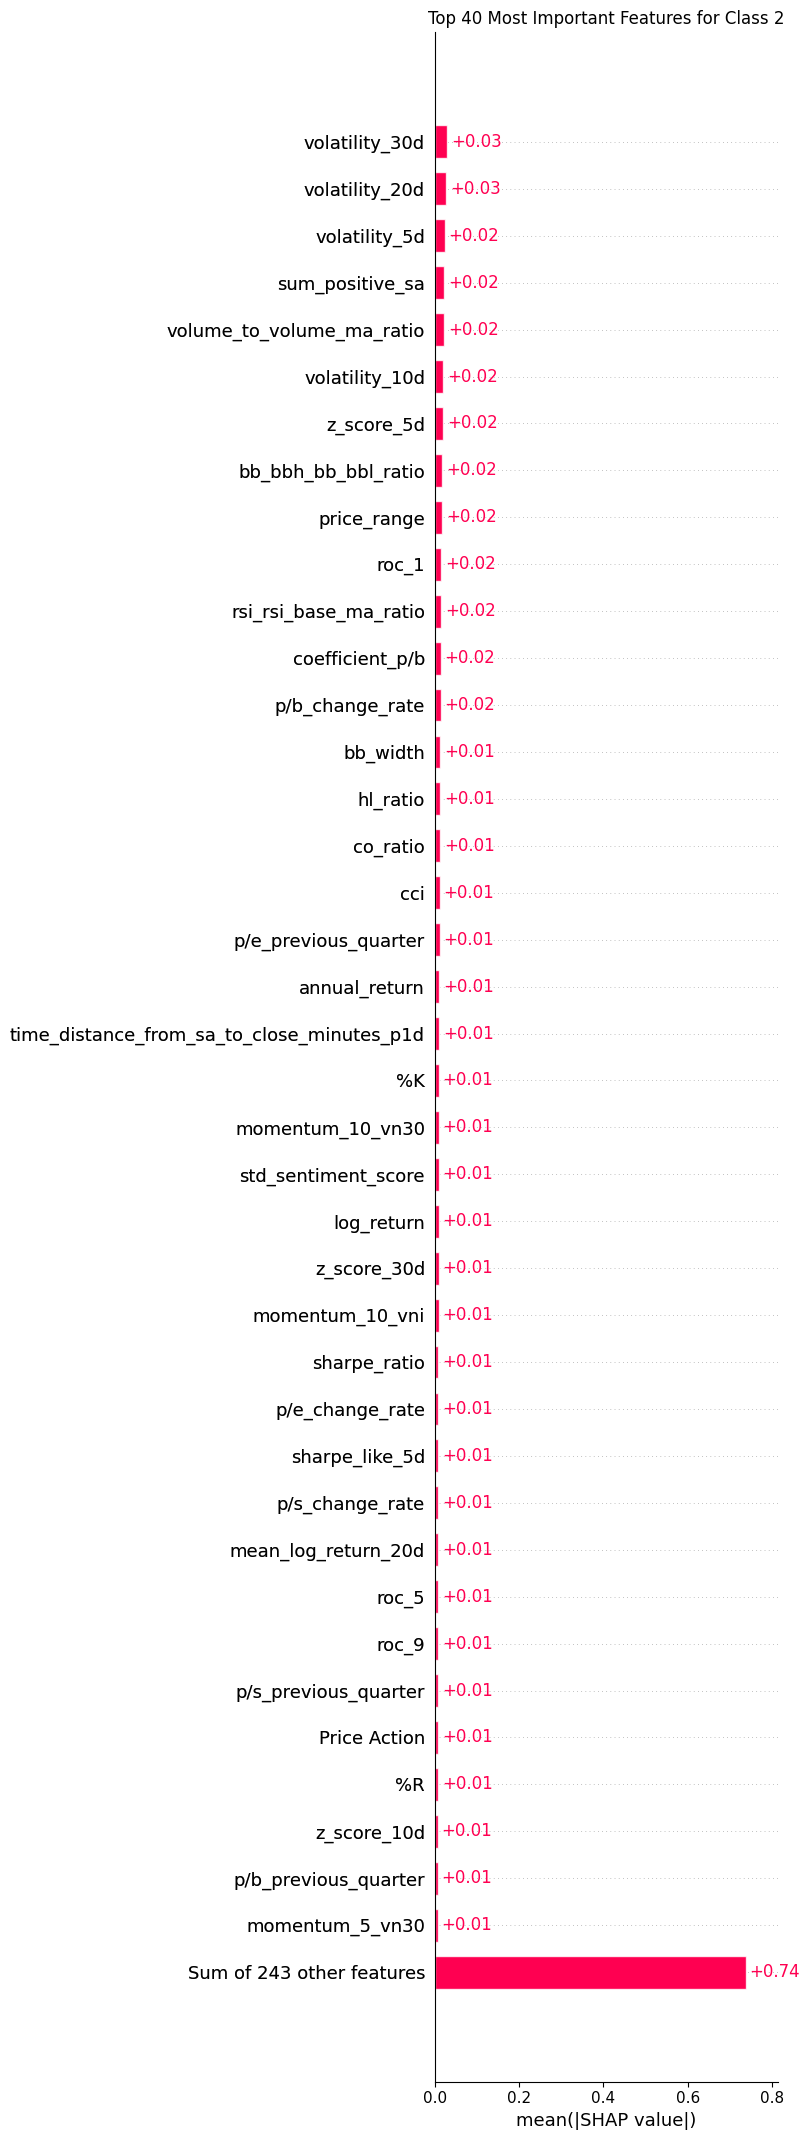

In [25]:
explanation = shap.Explanation(
    values=shap_values_transposed[2],
    base_values=explainer.expected_value[2],
    data=X_train_with_sa_scaled,
    feature_names=feature_names
)
ax = shap.plots.bar(explanation, max_display=40, show=False)  # show=False để tự đặt tiêu đề
plt.title("Top 40 Most Important Features for Class 2")
plt.tight_layout()
plt.show()